This notebook is baout the data cleaning of original dataset(covid19-cdc-20200201.csv). The final csv after cleaning is taken as an input to the "Homework 2". 

<b>Note : </b> This notebook will take about 3-4 mins to run from start to finish.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import calendar

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the given csv.
df = pd.read_csv('covid19-cdc-20200201.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of csv file

In [3]:
df.shape

(10000, 12)

The data has 10000 rows and 12 features per each entry

### Print first and last 5 rows of CSV file

In [4]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/07,2021/01/11,NaN,2021/01/07,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
1,2020/12/01,2020/12/03,2020/12/01,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
2,2020/10/28,2020/10/28,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing
3,2020/12/28,2021/01/07,2020/12/31,2020/12/28,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,No
4,2020/07/28,2020/08/06,2020/08/03,2020/07/28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No


In [5]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/10/04,2020/10/08,NaN,2020/10/04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
9996,2021/01/16,NaN,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
9997,2021/01/11,2021/01/15,NaN,2021/01/11,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing
9998,2020/10/02,2020/10/02,NaN,2020/10/02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Unknown,Missing,No,Missing
9999,2020/07/12,2020/07/26,2020/07/18,2020/07/12,Laboratory-confirmed case,Female,50 - 59 Years,Hispanic/Latino,Missing,Missing,No,Yes


### Convert features to appropriate datatypes

In [6]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

After examing the data in the csv file and the data types of those features, it is required to convert 4 features into date time features.

- cdc_case_earliest_dt, cdc_report_dt, pos_spec_dt, onset_dt will be converted into date time values. 
 
- The rest 8 features can be converted to categorical as each feature is having definite states

In [7]:
df.columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [8]:
df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,10000,324,2020/12/29,121
cdc_report_dt,7615,324,2020/06/10,132
pos_spec_dt,2779,312,2020/12/28,33
onset_dt,5045,325,2020/12/11,44
current_status,10000,2,Laboratory-confirmed case,9344
sex,10000,5,Female,5260
age_group,10000,10,20 - 29 Years,1930
race_ethnicity_combined,10000,9,Unknown,4113
hosp_yn,10000,5,No,5204
icu_yn,10000,4,Missing,7693


As described, we can observe that the first 4 features are having various different date values. Hence those are converted into detetime features. On the other hand, the other columns can be considered as categorical as there are limited number of categories.

In [9]:
# initially set date columns to datetime datatype. 
df['cdc_case_earliest_dt'] = pd.to_datetime(df['cdc_case_earliest_dt'],errors = 'ignore')
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'],errors = 'ignore')
df['pos_spec_dt'] = pd.to_datetime(df['pos_spec_dt'],errors = 'ignore')
df['onset_dt'] = pd.to_datetime(df['onset_dt'],errors = 'ignore')


In [10]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                     object
sex                                object
age_group                          object
race_ethnicity_combined            object
hosp_yn                            object
icu_yn                             object
death_yn                           object
medcond_yn                         object
dtype: object

In [11]:
# select all the remaining object features to convert them into categorical
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [12]:
#change each column and change the dtype as categorical
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes  

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [13]:
#store all the categorical features into a variable for future use
category_columns = df.select_dtypes(['category']).columns

Now all the features except datetime columns are converted into categorical.

#### All the features are converted to their appropriate types.

### Check for duplicate rows/columns

In [14]:
#store all the continous columns into a variable
numeric_columns = df.select_dtypes(['datetime64[ns]']).columns

In [15]:
numeric_columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'], dtype='object')

As seen below, there are no duplicate columns in the dataframe.
But the cdc_case_earliest_dt and onset_dt colums are identical(the dates values are same). 

Therefore, this onset_days feature can be considered to be dropped from the data frame as it is similar to cdc_case_earliest_days and also the missing values in this column are 4554. So it is better to remove this onset_days feature rather than cdc_case_earliest_days after further analysis.

In [16]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  445
Number of duplicate rows (including first) in the table is: 814


In [17]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [18]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset (id or patient number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 445 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. These rows can be safely dropped as they add no information.


- Columns - There are no duplicate columns. But it seems to be that the onset_days column is a duplicate of cdc_case_earliest_report.  We will also check the descriptive stats to make sure we did not miss any other duplicated columns and confirm whether the onset_dt is a duplicate column.

#### Duplicate rows can be seen below

In [19]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-01-07,2021-01-11,NaT,2021-01-07,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
39,2020-07-02,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
45,2020-12-21,NaT,NaT,NaT,Laboratory-confirmed case,Unknown,20 - 29 Years,Unknown,Missing,Missing,No,Missing
49,2020-12-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
63,2020-12-02,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9965,2021-01-06,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
9966,2020-11-03,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,Missing
9970,2020-12-12,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9971,2020-12-08,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Missing,Missing,No,Missing


In [20]:
# Check for duplicate rows and columns in this df that atually has duplicated rows, 
#to check the duplicate checks work correctly
duplicates_df = df[df.duplicated(keep=False)].iloc[29:37,:]
duplicates_df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
317,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
318,2021-01-04,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
347,2020-12-11,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
348,2020-07-20,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
356,2020-09-21,2020-09-21,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
368,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
375,2020-12-29,2020-12-29,NaT,2020-12-29,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing
390,2021-01-13,NaT,NaT,NaT,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Missing,Missing,No,Missing


In [21]:
print('Number of duplicate (excluding first) rows in the duplicate table is: ', duplicates_df.duplicated().sum())
print('Number of duplicate rows (including first) in the duplicate table is:', duplicates_df[duplicates_df.duplicated(keep=False)].shape[0])

#transpose the toy df
duplicates_dfT = duplicates_df.T
print("\nNumber of duplicate (excluding first) columns in the duplicate table is: ", duplicates_dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the duplicate table is: ",  duplicates_dfT[duplicates_dfT.duplicated(keep=False)].shape[0])


Number of duplicate (excluding first) rows in the duplicate table is:  1
Number of duplicate rows (including first) in the duplicate table is: 2

Number of duplicate (excluding first) columns in the duplicate table is:  1
Number of duplicate (including first) columns in the duplicate table is:  2


#### The duplicate checks seems to be working as expected.

Duplicate rows will now be dropped from the original data frame. Because the similar values are already registered in the dataset. May be the person is different and has more parameters. But those are not listed here and hence these can be **dropped** from the dataset. 

But only the old rows will be deleted(i.e. keep='last') because the number of covid cases in the intitial days are less so considering the latest record will be the accurate one. Also keep='first' deletes all the data with its duplicate rows due to which the original data is getting lost. Hence keep='last' will delete only the first occurance of the data so that only 1 record of the duplicates will be saved.

In [22]:
df = df.drop_duplicates(keep='last')
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


In [23]:
# min date  of cdc_case_earliest_dt is 2020-02-15 and min date of onset_dt is 2020-02-12
# As I converted these features into no of days there is diff b/w these values i.e. 3 = 2020-02-15 - 2020-02-12
# So to prove that these 2 features are same, for the comparision 3 is added with every cell in cdc_case_earliest_days

column_onset_duplicates_check = pd.concat([df[['cdc_case_earliest_dt']], df[['onset_dt']]], axis=1)

#drop all the missing values in onset_days feature 
column_onset_duplicates_check = column_onset_duplicates_check.dropna(subset=['onset_dt'])


In [24]:
# get all values which are not equal b/w 2 features
column_onset_duplicates_check[column_onset_duplicates_check['cdc_case_earliest_dt'] != column_onset_duplicates_check['onset_dt']]

,cdc_case_earliest_dt,onset_dt
83,2020-04-08,2020-04-28
92,2020-11-24,2020-12-24
95,2020-12-14,2020-12-15
127,2020-12-01,2020-12-03
444,2020-12-02,2020-12-04
...,...,...
9641,2020-04-14,2020-04-15
9652,2020-08-04,2020-09-16
9698,2020-05-24,2020-09-18
9704,2020-12-14,2020-12-15


According to the above comparision, we can observe that except 108 values all other data is in both features are same excluding the missing values. 

The 108 values is <2% of total data (i.e. 108 < 191(9555*0.02)). Hence the onset_days is a duplicate feature.

This result is not displayed in the previous duplicate columns because the NaN values are considered in onset_days whihc are not same in other feature and the 1% data which has different values.

So the onset_dt feature can be dropped from the dataframe because it is a duplicate and it contains more missing values than cdc_case_earliest_days feature. Hence this feature should be dropped.

### Integrity checks

##### Examine the cdc_case_earliest_dt feature

In [25]:
#Compare with cdc_report_dt, to check if some cases registered after reported.

print(df[df['cdc_case_earliest_dt']>df['cdc_report_dt']].shape)

(25, 12)


In [26]:
#Compare with pos_spec_dt, to check if case is found after taking the specimens

print(df[df['cdc_case_earliest_dt']>df['pos_spec_dt']].shape)

(72, 12)


From the above results, it indicates that there are some cases where the date recieved by cdc is later than reported date to cdc which is wrong. The report date indicates that the case is already registered. Hence, these are some wrong values which needs to be changed.

In [27]:
# Compare with pos_spec_dt, to check if the values are greater than the date after positive specimen collection
print(df[df['onset_dt']>df['pos_spec_dt']].shape)

(72, 12)


In [28]:
df['onset_dt'].isnull().sum()

4554

### Check for constant columns

#### Continous features

In [29]:
df[numeric_columns].head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt
1,2020-12-01,2020-12-03,2020-12-01,NaT
2,2020-10-28,2020-10-28,NaT,NaT
3,2020-12-28,2021-01-07,2020-12-31,2020-12-28
4,2020-07-28,2020-08-06,2020-08-03,2020-07-28
5,2020-12-02,NaT,NaT,NaT


In [30]:
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9555,324,2020-12-29,99,2020-02-15,2021-01-16
cdc_report_dt,7536,324,2020-06-10,130,2020-01-04,2021-01-29
pos_spec_dt,2758,312,2020-12-28,33,2020-01-04,2021-01-23
onset_dt,5001,325,2020-12-01,44,2020-02-12,2021-01-25


**Date features** - As it is a date time columns, these are considered as categorical features rather than numeric features. From the above details, it indicates that there are approximately 320 different values. 
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

#### Categorical features 

In [31]:
df_table_categ = df[category_columns].describe().T
df_table_categ

,count,unique,top,freq
current_status,9555,2,Laboratory-confirmed case,8903
sex,9555,5,Female,5027
age_group,9555,10,20 - 29 Years,1778
race_ethnicity_combined,9555,9,Unknown,3707
hosp_yn,9555,5,No,5135
icu_yn,9555,4,Missing,7266
death_yn,9555,2,No,9230
medcond_yn,9555,4,Missing,7040


**Categorical Data** - Reviewing the categorical data, we can see all unique values > 1
- Thus, it implies that there are no constant columns in the categorical data
- Result - No constant columns

### Check for Null Values


In [32]:
### Check for Null Values

df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2019
pos_spec_dt                6797
onset_dt                   4554
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

From the above results, we can observe that most of the columns does not have any null values. But,
- cdc_report_days contains 2019 = 20% of null values in total data which is less than 50% (max missing value cuttoff)
- pos_spec_days contains 6797 = 72% of null values in total data which is greater than 50%

Also we will check carefully if Null values are not coded differently in this dataset for other features. It could be that data is missing but it was not coded as Null in the original dataset.

### Check for Irregular cardinalities & permitted values

In [33]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Current status:", pd.unique(df["current_status"].ravel()))
print("\nSex:", pd.unique(df["sex"].ravel()))
print("\nAge group:", pd.unique(df["age_group"].ravel()))
print("\nRace:", pd.unique(df["race_ethnicity_combined"].ravel()))
print("\nHospital status(Yes/No):", pd.unique(df["hosp_yn"].ravel()))
print("\nICU status(Yes/No):", pd.unique(df["icu_yn"].ravel()))
print("\nDeath:", pd.unique(df["death_yn"].ravel()))
print("\nMedical condition:", pd.unique(df["medcond_yn"].ravel()))

Current status: ['Laboratory-confirmed case', 'Probable Case']
Categories (2, object): ['Laboratory-confirmed case', 'Probable Case']

Sex: ['Male', 'Female', 'Unknown', 'Missing', 'Other']
Categories (5, object): ['Male', 'Female', 'Unknown', 'Missing', 'Other']

Age group: ['30 - 39 Years', '10 - 19 Years', '20 - 29 Years', '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years', '80+ Years', '0 - 9 Years', 'Missing']
Categories (10, object): ['30 - 39 Years', '10 - 19 Years', '20 - 29 Years', '40 - 49 Years', ..., '70 - 79 Years', '80+ Years', '0 - 9 Years', 'Missing']

Race: ['White, Non-Hispanic', 'Unknown', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Hispanic/Latino', 'American Indian/Alaska Native, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'Missing', 'Native Hawaiian/Other Pacific Islander, Non-H...]
Categories (9, object): ['White, Non-Hispanic', 'Unknown', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', ..., 'American Indian/Alaska Native, Non-Hispanic', 'Mult

There are no irregular cardinalities. The values that appear seem to be in the permitted range. 

## Descriptive Statistics: 
Continuous Features

In [34]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")


cdc_case_earliest_dt
----------

Range cdc_case_earliest_dt is:  336 days 00:00:00
----------
Value  Number of Instances
2020-12-29    99
2021-01-05    97
2020-12-28    97
2020-11-30    96
2021-01-04    96
2021-01-06    92
2020-12-01    89
2020-12-30    87
2020-12-16    87
2020-12-31    83
2021-01-11    82
2020-12-14    81
2020-12-11    80
2020-12-17    80
2020-12-22    77
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
----------

Range cdc_report_dt is:  391 days 00:00:00
----------
Value  Number of Instances
2020-06-10    130
2021-01-27     92
2020-12-29     86
2020-11-17     80
2020-12-17     77
2020-11-30     72
2020-12-14     68
2021-01-16     66
2020-12-28     64
2021-01-19     64
2021-01-26     63
2021-01-22     63
2020-12-02     62
2021-01-21     61
2020-12-31     59
Name: cdc_report_dt, dtype: int64 



pos_spec_dt
----------

Range pos_spec_dt is:  385 days 00:00:00
----------
Value  Number of Instances
2020-12-28    33
2020-11-10    33
2021-01-04    32
2021-01-11

In [35]:
# For each category column print all the categories with nan values
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts(dropna=False))


current_status
Laboratory-confirmed case    8903
Probable Case                 652
Name: current_status, dtype: int64

sex
Female     5027
Male       4437
Unknown      78
Missing      12
Other         1
Name: sex, dtype: int64

age_group
20 - 29 Years    1778
30 - 39 Years    1488
50 - 59 Years    1374
40 - 49 Years    1339
10 - 19 Years    1031
60 - 69 Years    1025
70 - 79 Years     601
80+ Years         472
0 - 9 Years       439
Missing             8
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3707
White, Non-Hispanic                                     3213
Hispanic/Latino                                          991
Black, Non-Hispanic                                      694
Multiple/Other, Non-Hispanic                             494
Asian, Non-Hispanic                                      256
Missing                                                  114
American Indian/Alaska Native, Non-Hispanic               6

In [36]:
# For each category column print all the values excluding nan values
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts())


current_status
Laboratory-confirmed case    8903
Probable Case                 652
Name: current_status, dtype: int64

sex
Female     5027
Male       4437
Unknown      78
Missing      12
Other         1
Name: sex, dtype: int64

age_group
20 - 29 Years    1778
30 - 39 Years    1488
50 - 59 Years    1374
40 - 49 Years    1339
10 - 19 Years    1031
60 - 69 Years    1025
70 - 79 Years     601
80+ Years         472
0 - 9 Years       439
Missing             8
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3707
White, Non-Hispanic                                     3213
Hispanic/Latino                                          991
Black, Non-Hispanic                                      694
Multiple/Other, Non-Hispanic                             494
Asian, Non-Hispanic                                      256
Missing                                                  114
American Indian/Alaska Native, Non-Hispanic               6

From above results, it is observed that there no 'Nan' values in tha data frame. So, the values counts with and without NaN is same

In [37]:
#Normalize the results of categorical data
for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts(normalize=True))


current_status
Laboratory-confirmed case    0.931763
Probable Case                0.068237
Name: current_status, dtype: float64

sex
Female     0.526112
Male       0.464364
Unknown    0.008163
Missing    0.001256
Other      0.000105
Name: sex, dtype: float64

age_group
20 - 29 Years    0.186081
30 - 39 Years    0.155730
50 - 59 Years    0.143799
40 - 49 Years    0.140136
10 - 19 Years    0.107902
60 - 69 Years    0.107274
70 - 79 Years    0.062899
80+ Years        0.049398
0 - 9 Years      0.045945
Missing          0.000837
Name: age_group, dtype: float64

race_ethnicity_combined
Unknown                                                 0.387964
White, Non-Hispanic                                     0.336264
Hispanic/Latino                                         0.103715
Black, Non-Hispanic                                     0.072632
Multiple/Other, Non-Hispanic                            0.051701
Asian, Non-Hispanic                                     0.026792
Missing               

In [38]:
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN
age_group,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity_combined,NaN,NaN,NaN,NaN,NaN,NaN
hosp_yn,NaN,NaN,NaN,NaN,NaN,NaN
icu_yn,NaN,NaN,NaN,NaN,NaN,NaN
death_yn,NaN,NaN,NaN,NaN,NaN,NaN
medcond_yn,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# calculate the mode, freq of mode, %mode, 2nd mode, freq of 2nd mode, % of 2nd mode for all category data

for column in category_columns:
    print("\n" + '\033[1m' + column + '\033[0m')
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


current_status
Laboratory-confirmed case    8903
Probable Case                 652
Name: current_status, dtype: int64
CategoricalIndex(['Laboratory-confirmed case', 'Probable Case'], categories=['Laboratory-confirmed case', 'Probable Case'], ordered=False, dtype='category')

sex
Female     5027
Male       4437
Unknown      78
Missing      12
Other         1
Name: sex, dtype: int64
CategoricalIndex(['Female', 'Male', 'Unknown', 'Missing', 'Other'], categories=['Female', 'Male', 'Missing', 'Other', 'Unknown'], ordered=False, dtype='category')

age_group
20 - 29 Years    1778
30 - 39 Years    1488
50 - 59 Years    1374
40 - 49 Years    1339
10 - 19 Years    1031
60 - 69 Years    1025
70 - 79 Years     601
80+ Years         472
0 - 9 Years       439
Missing             8
Name: age_group, dtype: int64
CategoricalIndex(['20 - 29 Years', '30 - 39 Years', '50 - 59 Years',
                  '40 - 49 Years', '10 - 19 Years', '60 - 69 Years',
                  '70 - 79 Years', '80+ Years', '0 - 

In [40]:
# print the final dataframe of categorical data
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,Laboratory-confirmed case,8903,0.931763,Probable Case,652,0.068237
sex,Female,5027,0.526112,Male,4437,0.464364
age_group,20 - 29 Years,1778,0.186081,30 - 39 Years,1488,0.15573
race_ethnicity_combined,Unknown,3707,0.387964,"White, Non-Hispanic",3213,0.336264
hosp_yn,No,5135,0.537415,Missing,2138,0.223757
icu_yn,Missing,7266,0.76044,Unknown,1271,0.133019
death_yn,No,9230,0.965986,Yes,325,0.034014
medcond_yn,Missing,7040,0.736787,No,930,0.097331


From the above results, we can observer that 20-29 years age people are highly infected to the disease but there are no deaths in that category. While 30-39 Years age people are prone to death.

In [41]:
#calculate the percentage of missing values in the categorical data and store it a dataframe
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
current_status,0.0
sex,0.0
age_group,0.0
race_ethnicity_combined,0.0
hosp_yn,0.0
icu_yn,0.0
death_yn,0.0
medcond_yn,0.0


In [42]:
# check the cardinality and store it in a dataframe for all categorical data
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
current_status,2
sex,5
age_group,10
race_ethnicity_combined,9
hosp_yn,5
icu_yn,4
death_yn,2
medcond_yn,4


### - Prepare a table with descriptive statistics for all the categorical features.


In [43]:
# combine all the analysis for the category data and print the descriptive statistics of it
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
current_status,9555,2,Laboratory-confirmed case,8903,Laboratory-confirmed case,8903,0.931763,Probable Case,652,0.068237,0.0
sex,9555,5,Female,5027,Female,5027,0.526112,Male,4437,0.464364,0.0
age_group,9555,10,20 - 29 Years,1778,20 - 29 Years,1778,0.186081,30 - 39 Years,1488,0.15573,0.0
race_ethnicity_combined,9555,9,Unknown,3707,Unknown,3707,0.387964,"White, Non-Hispanic",3213,0.336264,0.0
hosp_yn,9555,5,No,5135,No,5135,0.537415,Missing,2138,0.223757,0.0
icu_yn,9555,4,Missing,7266,Missing,7266,0.76044,Unknown,1271,0.133019,0.0
death_yn,9555,2,No,9230,No,9230,0.965986,Yes,325,0.034014,0.0
medcond_yn,9555,4,Missing,7040,Missing,7040,0.736787,No,930,0.097331,0.0


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [44]:
df_category_columns_data_quality_report_table.to_csv("CDC-Descriptive_statistics-Categorical-Table.csv", index_label='Feature')

#### Continous features

In [45]:
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
cdc_case_earliest_dt,0.000000
cdc_report_dt,21.130298
pos_spec_dt,71.135531
onset_dt,47.660911


In [46]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
cdc_case_earliest_dt,324
cdc_report_dt,324
pos_spec_dt,312
onset_dt,325


### - Prepare a table with descriptive statistics for all the continuous features.


In [47]:
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table

,count,unique,top,freq,first,last,%missing,card
cdc_case_earliest_dt,9555,324,2020-12-29,99,2020-02-15,2021-01-16,0.000000,324
cdc_report_dt,7536,324,2020-06-10,130,2020-01-04,2021-01-29,21.130298,324
pos_spec_dt,2758,312,2020-12-28,33,2020-01-04,2021-01-23,71.135531,312
onset_dt,5001,325,2020-12-01,44,2020-02-12,2021-01-25,47.660911,325


### - Save descriptive statistics for all the continuous features to csv for data quality report


In [48]:
# Print data quality report table for numeric features to a csv file.
df_numeric_columns_data_quality_report_table.to_csv("CDC-Descriptive_statistics-NumericFeatures-Table.csv",index_label='Feature')


### - Save updated/cleaned data frame to a new csv file.

In [49]:
# Write the dataframe to a csv file
df.to_csv('CDC_1-1_cleaned.csv', index=False)

## Data Quality report - visualisations

### - Plot histograms summary sheet for all the continuous features.

In [50]:
numeric_columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'], dtype='object')

<AxesSubplot:>

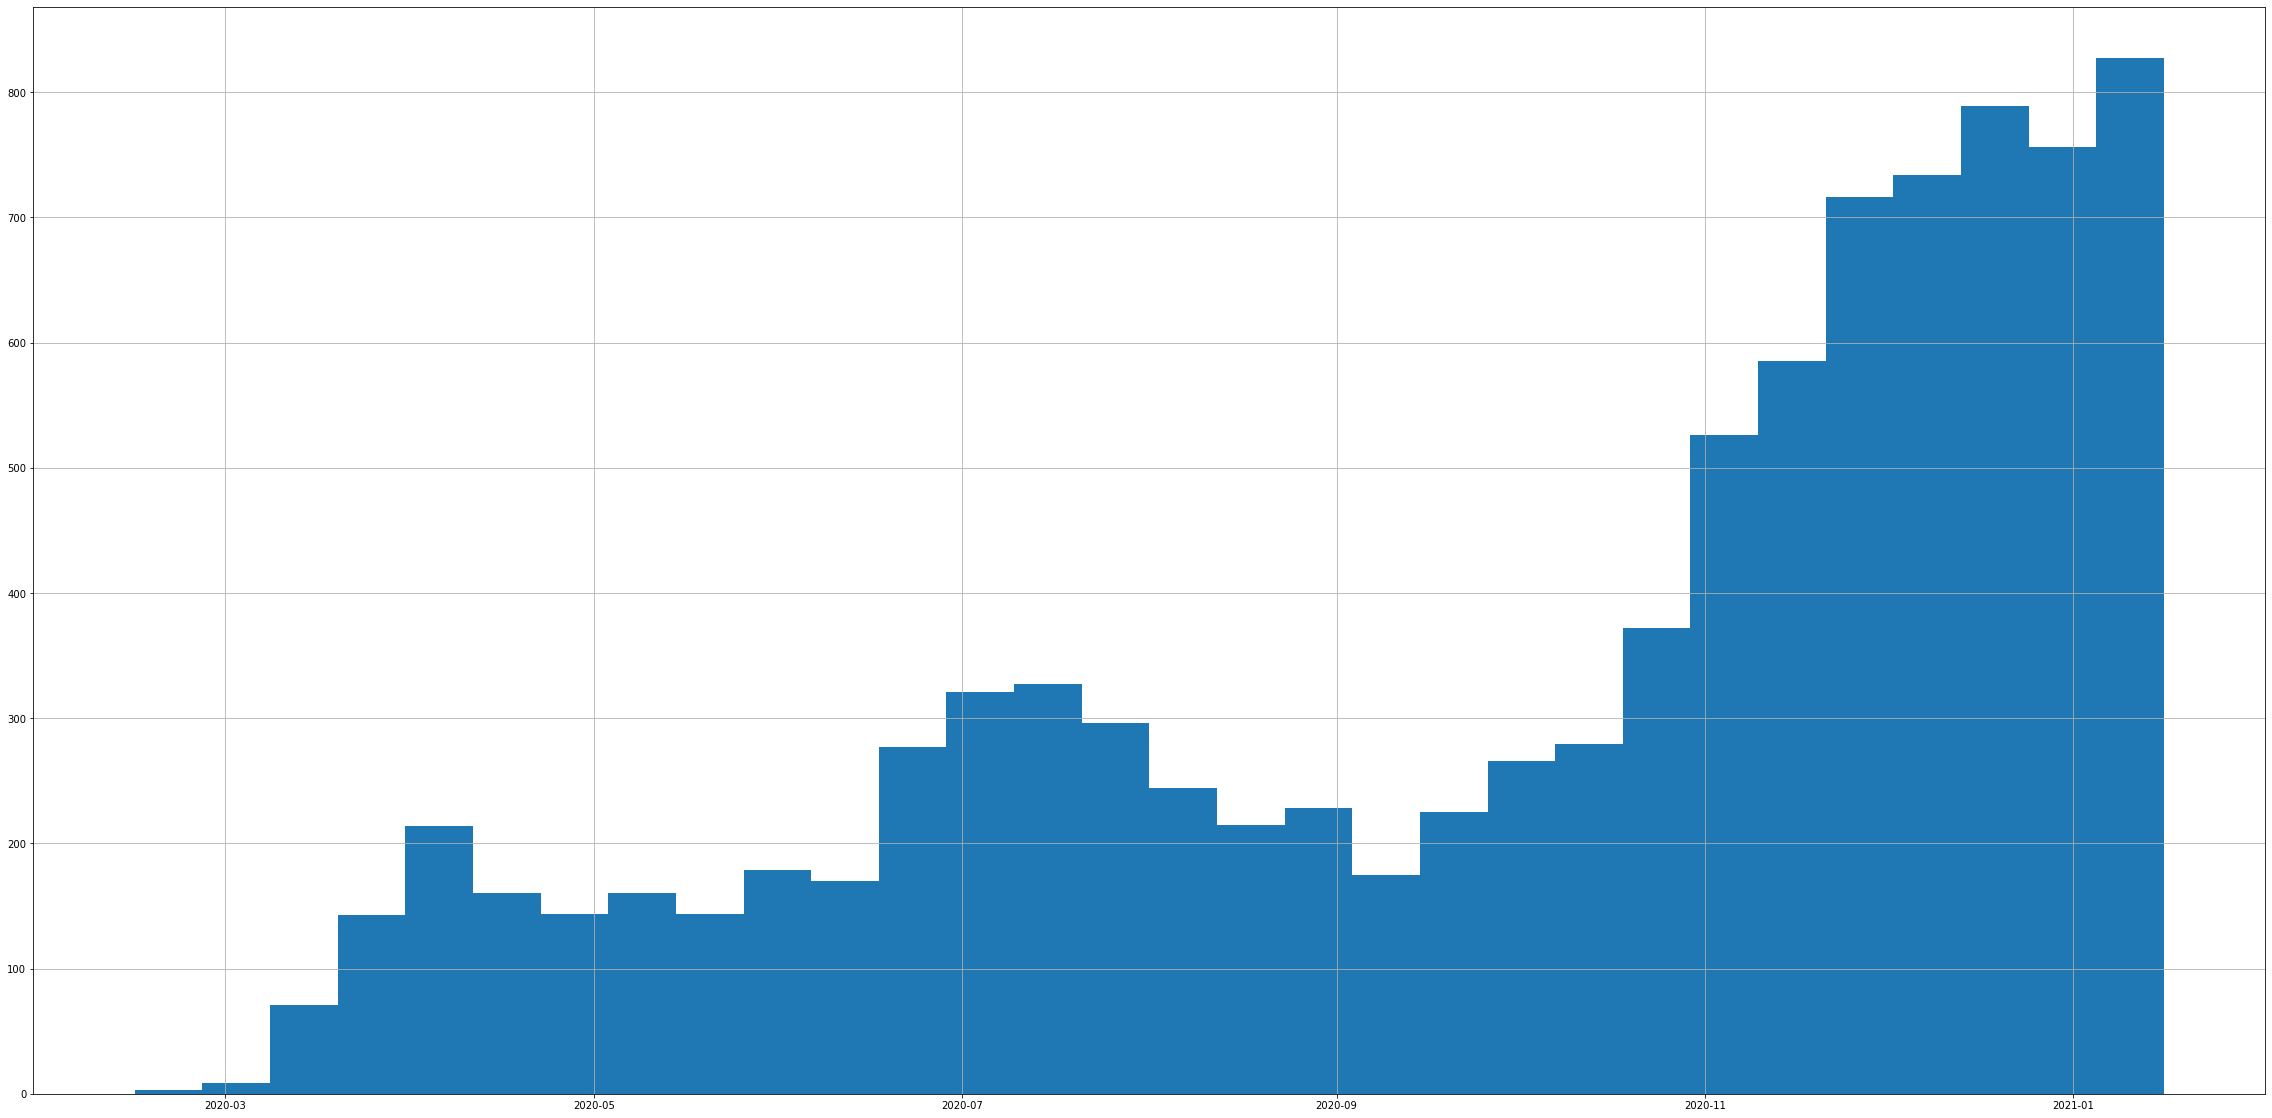

In [51]:
df["cdc_case_earliest_dt"].hist(figsize=(40, 20), bins=30)

<AxesSubplot:>

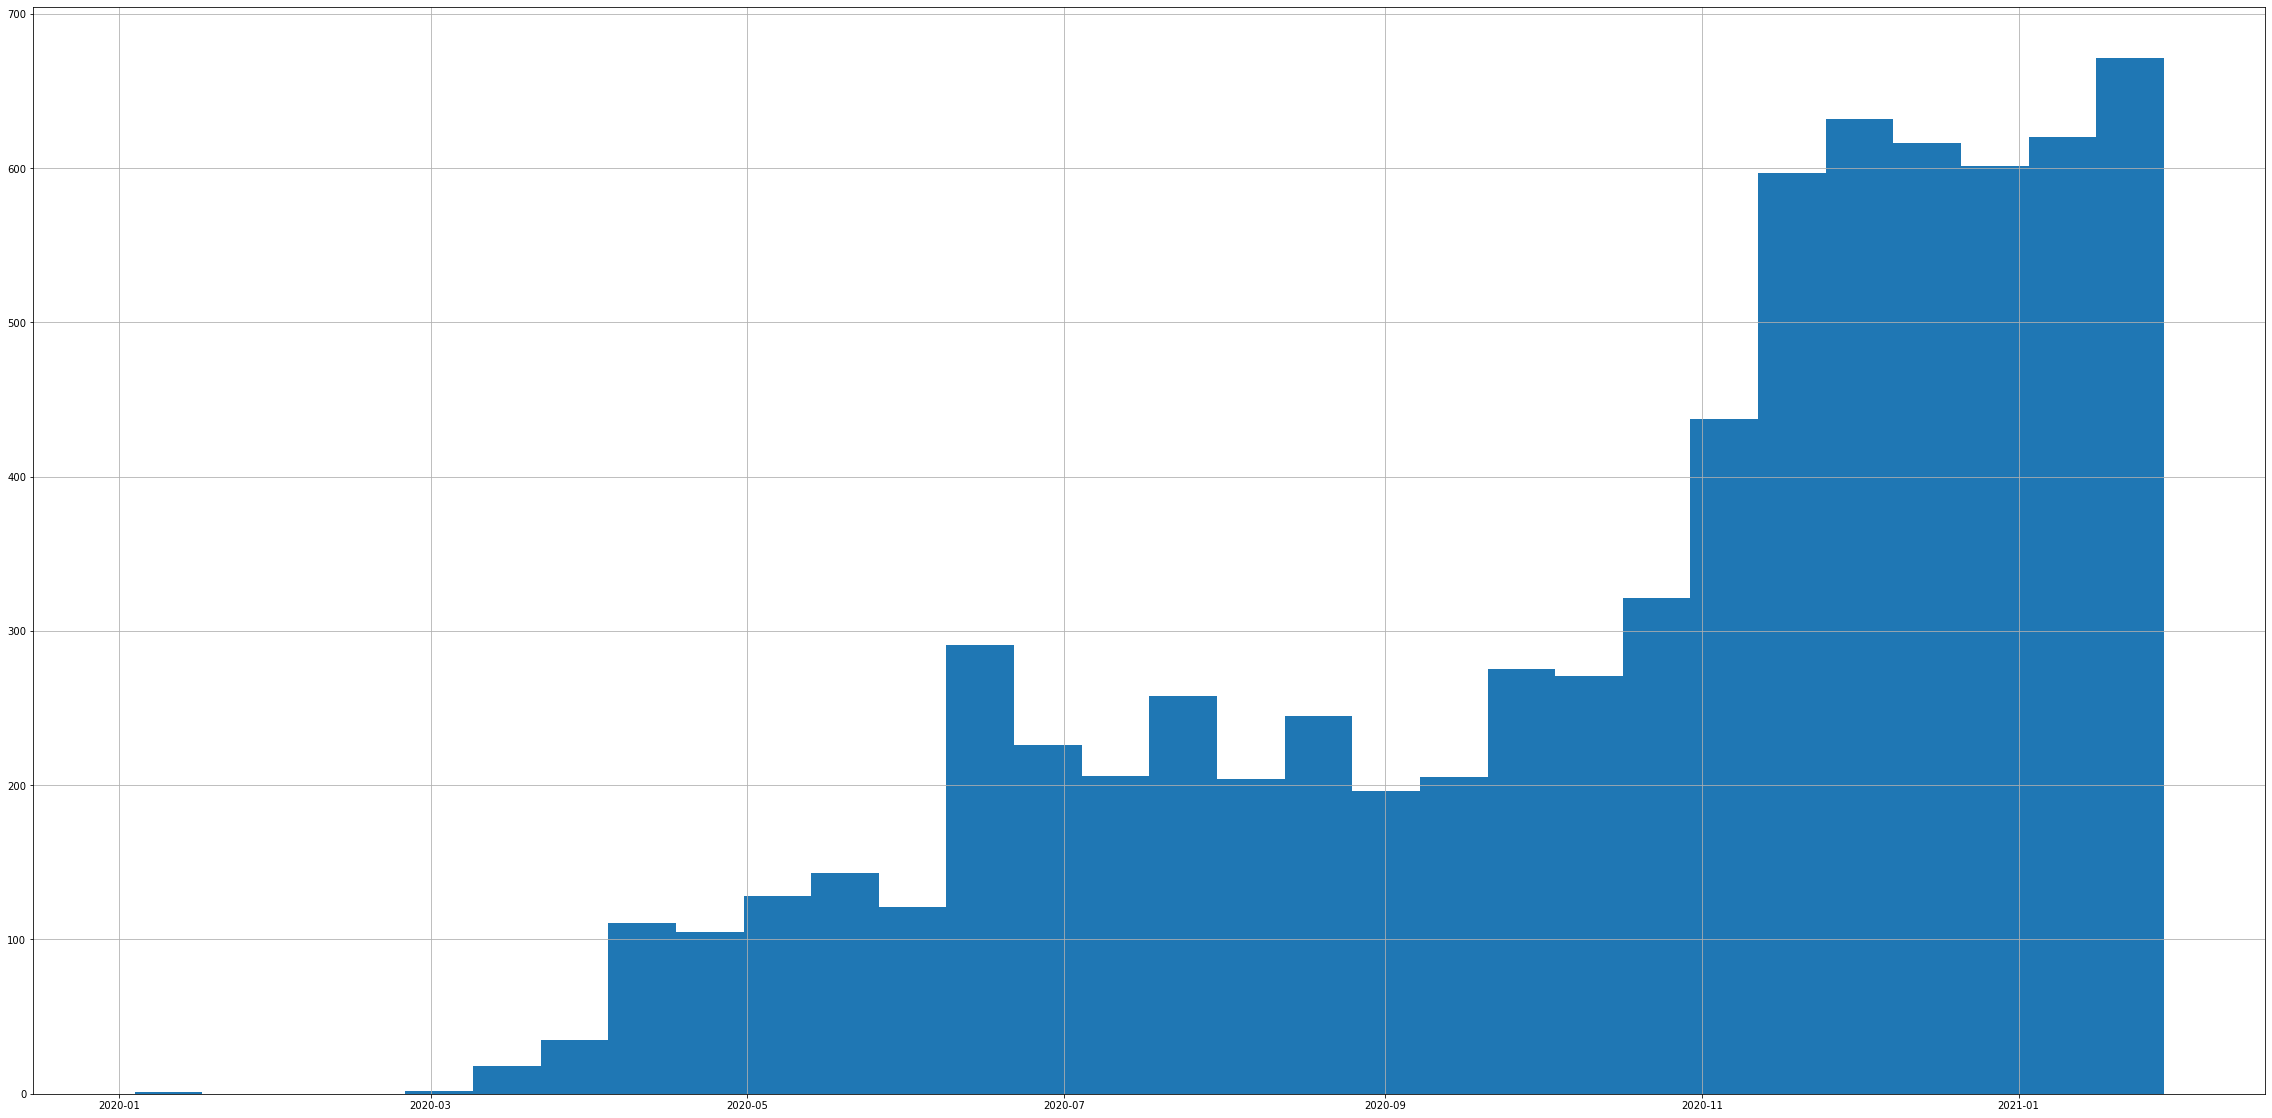

In [52]:
df["cdc_report_dt"].hist(figsize=(40, 20), bins=30)

<AxesSubplot:>

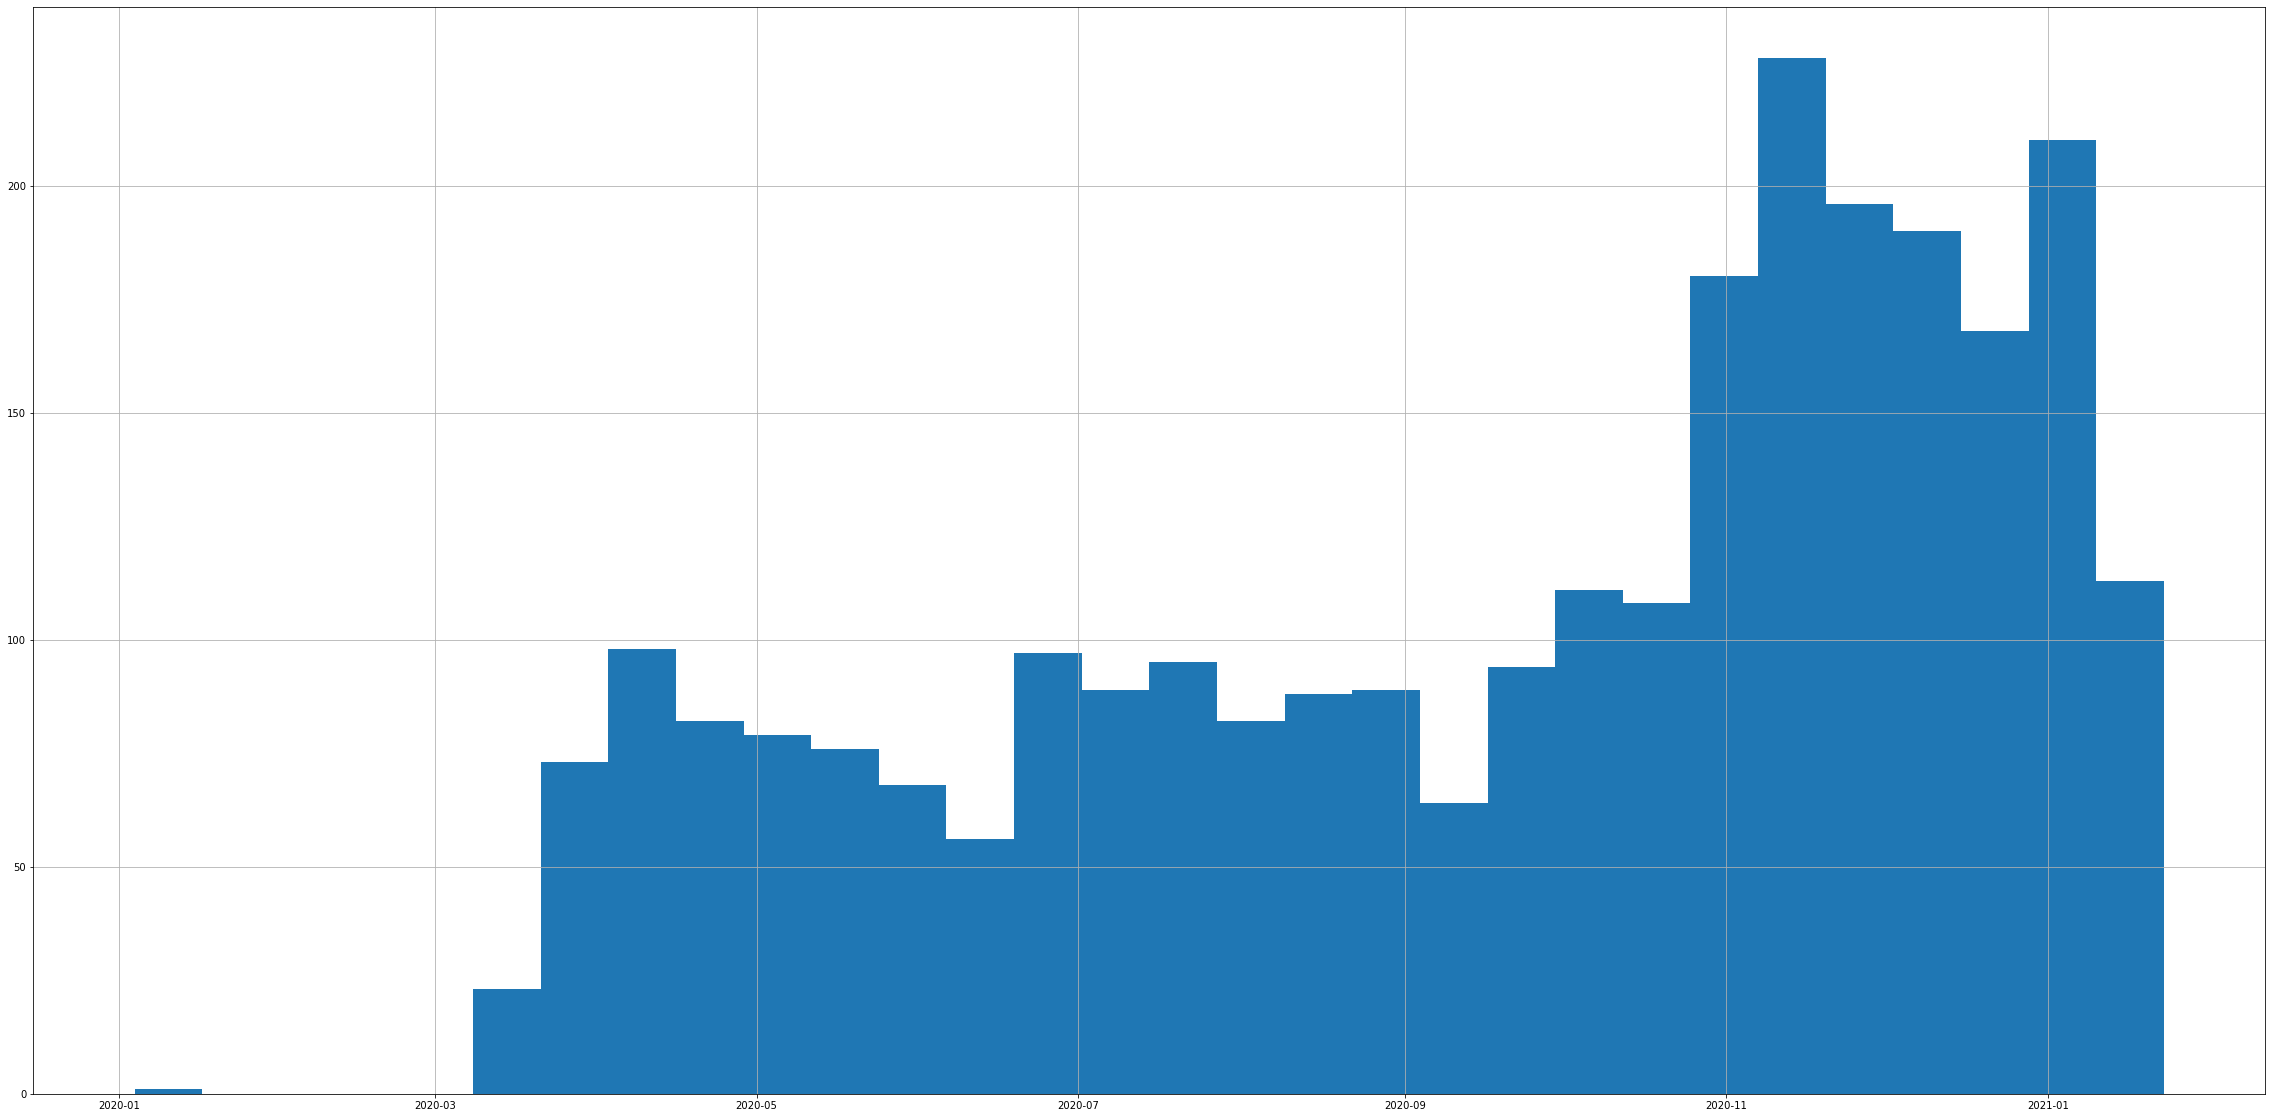

In [53]:
df["pos_spec_dt"].hist(figsize=(40, 20), bins=30)

<AxesSubplot:>

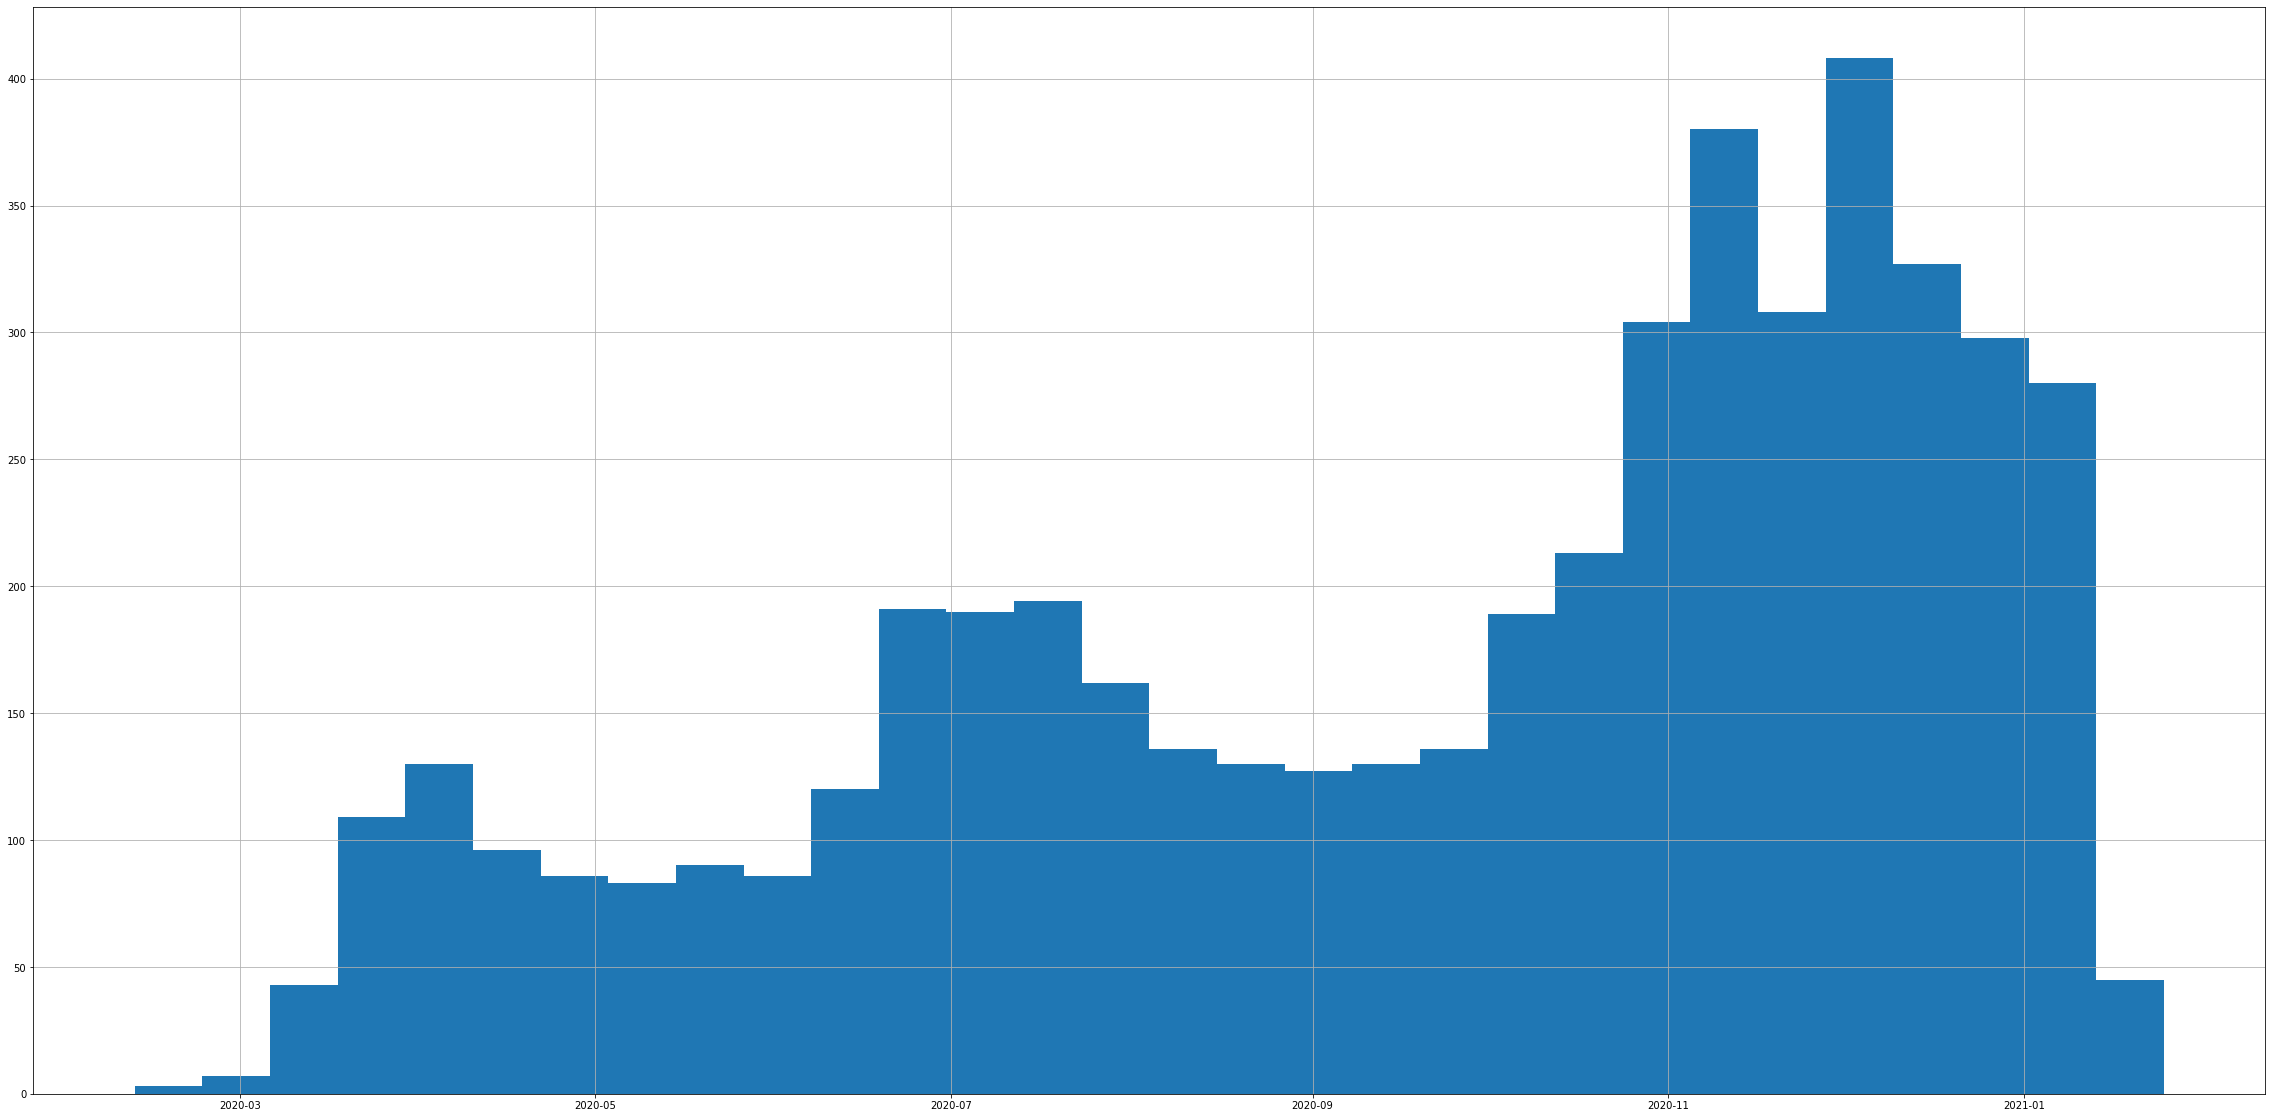

In [54]:
df["onset_dt"].hist(figsize=(40, 20), bins=30)

From above plots, we can observe that the number of covid patients are reported increasingly from Novemer 2020 to January 2021.

### - Plot bar plots summary sheet for all the categorical features.

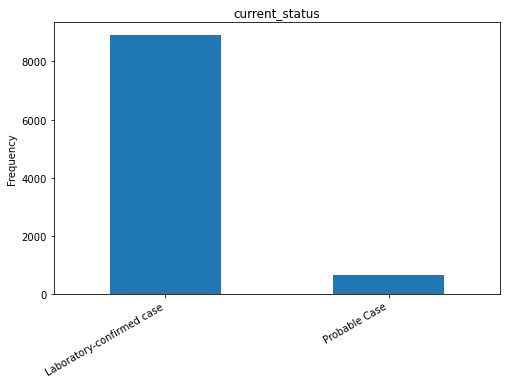

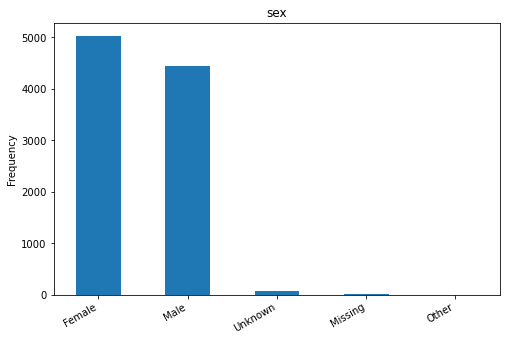

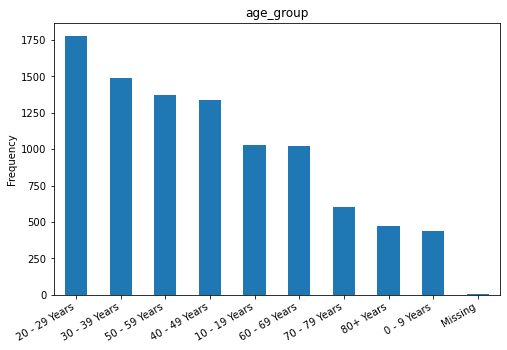

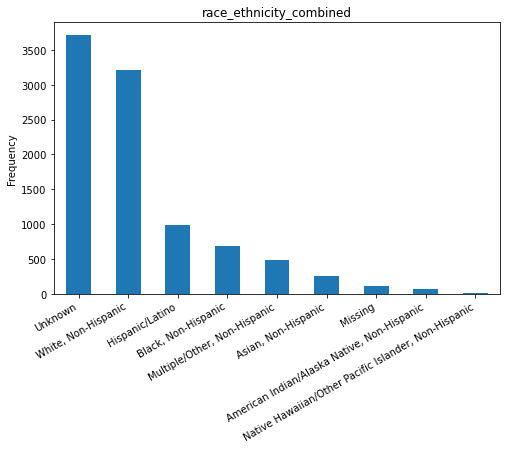

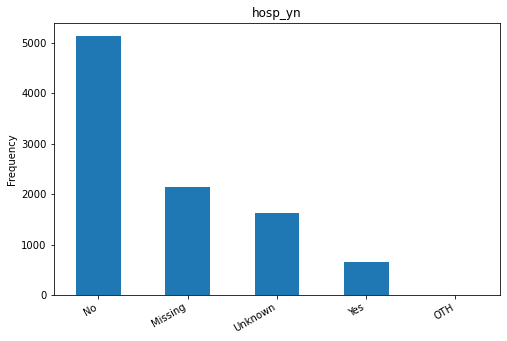

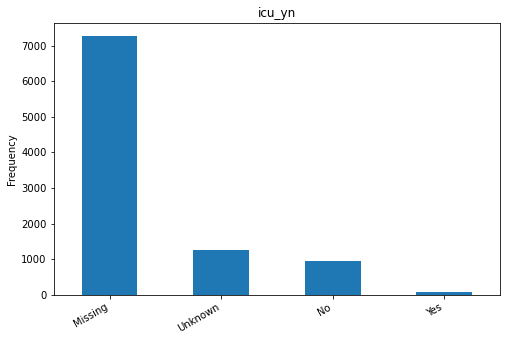

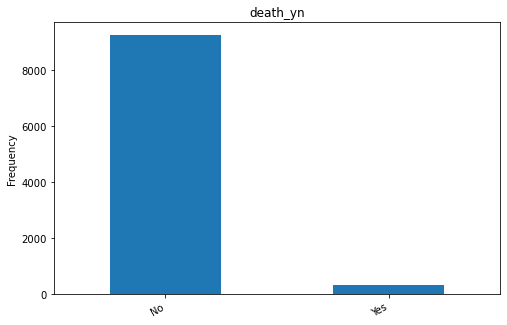

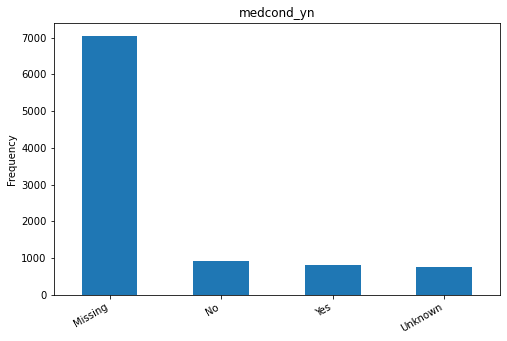

In [55]:
# plot the individual bar plot for all the categorical features.
# We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 

pdf_file = PdfPages('Categorical-Barplots_1-1.pdf')
for column in category_columns:
    image = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(8,5))
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Frequency')
    plt.show()
    pdf_file.savefig(image.get_figure())
pdf_file.close()

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:


## Data Quality Plan

In [56]:
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2019
pos_spec_dt                6797
onset_dt                   4554
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

In [57]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

## Data Understanding: Data Quality Plan

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|cdc_case_earliest_dt                         |   None| Do imputation on values which are wrong|
cdc_report_dt             | 20% missing data              | Drop the missing values.        
pos_spec_dt        | More than 72% values are NaN values | Check the relation and drop the feature as there are more missing values|
onset_dt          | 45% missing data                   | Examine the rows, check the relation and drop it.         |
current_status (category)                 | None | Keep as is|   
sex (category)                | 0.12% Missing values, 0.81 Unknown values | Check against other columns and relation with target and drop if neccesary|
age_group (category)    | 0.08% Missing values | Check against other columns and relation with target and drop if neccesary|
race_ethnicity_combined (category)                  | 2.59% missing values, 41.1% unknown values | Combine into single value|
hosp_yn (category)                 | 23% missing values, 17.7% unkown values |  Combine into single value |    
icu_yn (category)                    | 76% missing values, 12.8% unkown values | Combine into single value  |   
death_yn (category)             | None | keep as is |
medcond_yn (category)               | 74.6% missing values, 7.7% unknown values | Combine into single value and keep as is|

#### Implementing handling strategy for cdc_case_earliest_dt

There are some rows, in which cdc_case_earliest_dt dates are greater than cdc_report_dt which is incorrect as these values should be less than report date. Because, before the case gets entered in earliest first before reporting. Hence these values does not make sense to keep them as such. These values are shown below.

In [58]:
#Stoe all the date rows which are greater than report days in a new dataframe.
df_cdc_earliest_dates_later = df[df['cdc_case_earliest_dt']>df['cdc_report_dt']]

In [59]:
#Print those rows 
df_cdc_earliest_dates_later

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
380,2020-12-30,2020-01-04,2020-01-04,2020-12-30,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,Missing,No,Yes
779,2020-06-22,2020-06-21,2020-06-21,2020-06-22,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Unknown,No,Yes
1113,2020-12-08,2020-12-07,2020-12-07,2020-12-08,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,No
2367,2020-12-12,2020-12-11,2020-12-11,2020-12-12,Laboratory-confirmed case,Female,50 - 59 Years,Hispanic/Latino,No,No,No,Yes
2946,2020-12-17,2020-12-15,2020-12-15,2020-12-17,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,No
3211,2020-11-06,2020-11-05,2020-11-05,2020-11-06,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Yes
4236,2020-09-16,2020-09-15,2020-09-15,2020-09-16,Laboratory-confirmed case,Female,60 - 69 Years,Hispanic/Latino,No,Unknown,No,No
4331,2020-10-24,2020-10-22,2020-10-22,2020-10-24,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Unknown,No,No
4388,2020-08-05,2020-08-03,2020-08-03,2020-08-05,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",No,Unknown,No,Unknown
5155,2020-04-26,2020-04-24,2020-04-24,2020-04-26,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,No,No,Yes


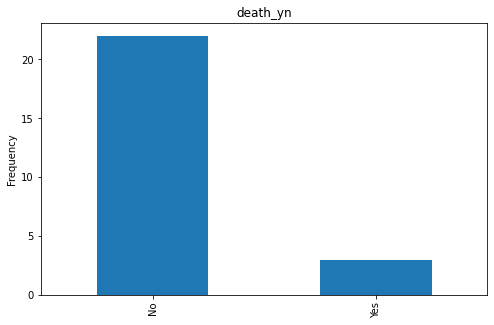

In [60]:
# Check the relation between these rows and death_yn
df_cdc_earliest_dates_later['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

The above graph indicates that this data is having useful information and having a strong relation between the number of deaths and cdc_case_earliest_days. Hence instaed of dropping these rows, the imputation with the cdc_report_dt will be safe as to avoid loosing these health related data.

In [61]:
# Get all the values which are greater into a variable filter. 
# This variable consists of values with true when the date is greater.
#And convert them with report date for those rows

filter = df['cdc_case_earliest_dt']>df['cdc_report_dt']
df.loc[filter, "cdc_case_earliest_dt"] = df.loc[filter, "cdc_report_dt"]

In [62]:
# Check whether the values are converted or not.

df[df['cdc_case_earliest_dt']>df['cdc_report_dt']]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


##### Implementing handling strategy for cdc_report_dt

In [63]:
#Get all the missing values in this feature
df['cdc_report_dt'].isnull().sum()

2019

In [64]:
# Store all the missing values in a new data frame.
df_report_dt_missing = df[df['cdc_report_dt'].isnull()]

In [65]:
# Print all the missing rows.
df_report_dt_missing

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
5,2020-12-02,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
13,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Missing,Missing,No,Missing
17,2020-06-11,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Missing,Missing,No,Missing
26,2020-07-03,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
27,2020-12-13,NaT,NaT,NaT,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Yes,Yes,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,2020-06-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Missing,No,Missing
9983,2021-01-04,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
9986,2020-12-01,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
9989,2021-01-05,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,No,Missing,No,Missing


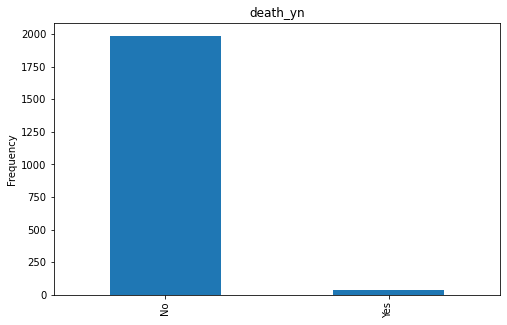

In [66]:
# Check the relation between the report_dt and target feature.

df_report_dt_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

The above graph indicates that ther is no much strong relation between cdc_report_dt and death_yn. Also, the values in this feature are depricated with cdc_case_earliest_dt. Futhermore, this feature consists of 20% missing values. Hence, this column can be dropped from the dataset as the cdc_case_earliest_dt also representing the same data.

In [67]:
#Drop the feature from the dataframe.
df.drop(['cdc_report_dt'], axis='columns', inplace=True)

##### Implementing handling strategy for pos_spec_dt

In [68]:
df[df['onset_dt']>df['pos_spec_dt']]

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
188,2020-11-04,2020-11-03,2020-11-04,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,No,No,Missing
380,2020-01-04,2020-01-04,2020-12-30,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,Missing,No,Yes
451,2020-07-11,2020-07-08,2020-07-15,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,No,No,No
462,2020-10-19,2020-10-14,2020-10-19,Laboratory-confirmed case,Female,20 - 29 Years,"Multiple/Other, Non-Hispanic",No,No,No,No
469,2020-07-10,2020-07-06,2020-10-10,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9568,2020-07-01,2020-07-01,2020-07-15,Laboratory-confirmed case,Male,10 - 19 Years,Hispanic/Latino,No,Unknown,No,No
9608,2020-12-23,2020-12-21,2020-12-23,Laboratory-confirmed case,Male,0 - 9 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,No,No
9627,2020-04-26,2020-04-23,2020-05-07,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,No,Yes,Yes
9660,2020-06-05,2020-06-05,2020-06-07,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,Yes,No,No,Unknown


In [69]:
df_pos_spec_missing = df[df['pos_spec_dt'].isnull()]

In [70]:
df_pos_spec_non_missing = df[df['pos_spec_dt'].notnull()]

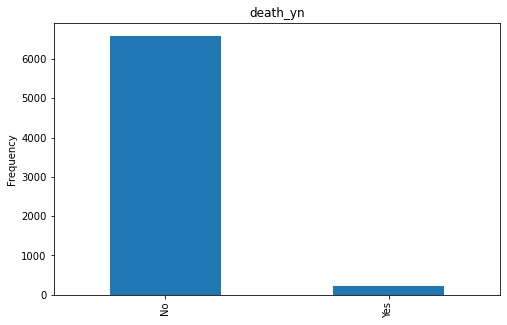

In [71]:
# Check the relation between the pos_spec_dt and target feature.

df_pos_spec_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

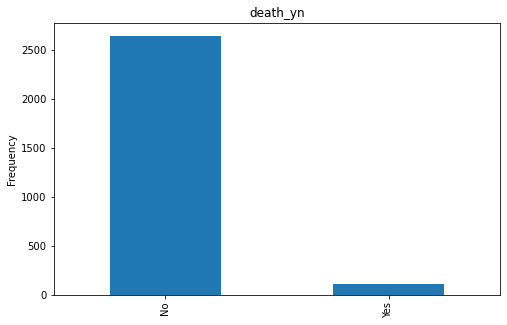

In [72]:
# Check the relation between the pos_spec_dt and target feature.

df_pos_spec_non_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

In [73]:
#Drop the feature from the dataframe.
df.drop(['pos_spec_dt'], axis='columns', inplace=True)

In [74]:
df.head()

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,No
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing


#### Implementing handling strategy for on_set_dt

In [75]:
df_on_spec_missing = df[df['onset_dt'].isnull()]

In [76]:
df_on_spec_non_missing = df[df['onset_dt'].notnull()]

In [77]:
df_on_spec_missing[df_on_spec_missing['death_yn'] == 'Yes']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
27,2020-12-13,NaT,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Yes,Yes,Missing
31,2020-12-13,NaT,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Unknown,Missing,Yes,Missing
36,2021-01-04,NaT,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Unknown
77,2020-04-09,NaT,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Unknown,Yes,Missing
130,2020-04-01,NaT,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
9881,2020-12-30,NaT,Laboratory-confirmed case,Female,80+ Years,Unknown,Yes,Missing,Yes,No
9893,2020-11-30,NaT,Laboratory-confirmed case,Male,80+ Years,Hispanic/Latino,Missing,Missing,Yes,Missing
9908,2020-12-15,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Unknown,Yes,Missing
9957,2020-12-17,NaT,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing


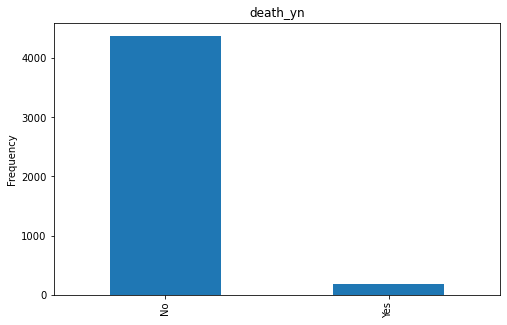

In [78]:
# Check the relation between the pos_spec_dt and target feature.

df_on_spec_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

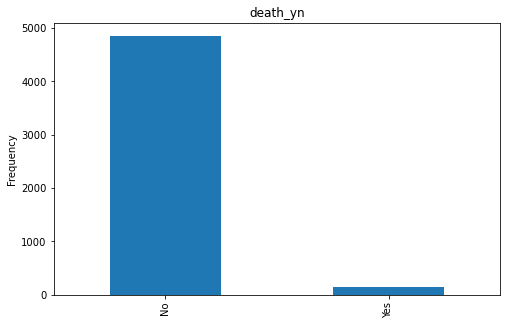

In [79]:
# Check the relation between the pos_spec_dt and target feature.

df_on_spec_non_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

From the above graphs, it indicates that there is some trend in missing data with respect to the target feature. The trend shows that there are some cases where people died after getting reported to cdc and having symptoms. On the other hand, the data is having 50% of missing values and most of other half data is having number of deaths. Even then, there are some cases where people got effected i.e. 178 people died. Hence, instead of loosing this data as this is health related data the information will be extracted by creating a **new feature** in section 4 and then this feature will be dropped.

#### Implementing handling strategy for sex feature

In [80]:
df_sex_missing = df[df['sex']=='Missing']

In [81]:
df_sex_missing.shape

(12, 10)

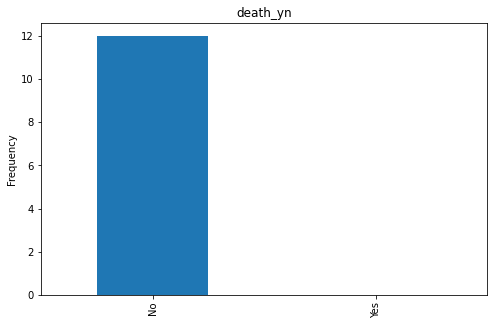

In [82]:
df_sex_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

The above bar graph indicates that there is no strong relation between the missing data of sex feature and death_yn. Hence these rows can be dropped from the dataset.

In [83]:
df = df[df.sex != 'Missing']

In [84]:
df.shape

(9543, 10)

##### Implementing handling strategy for age group

In [85]:
df_age_group_missing = df[df['age_group']=='Missing']

In [86]:
df_age_group_missing.shape

(8, 10)

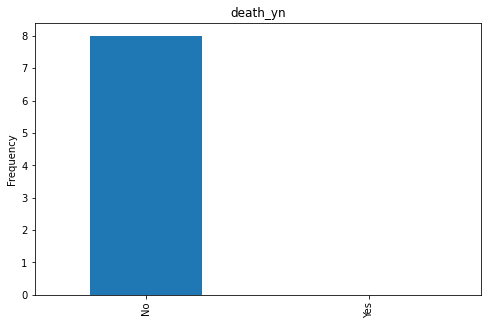

In [87]:
df_age_group_missing['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(8,5))
plt.ylabel('Frequency')
plt.show()

From the above bar graph, it indicates that there is no strong relation between missing data of age group and death_yn. Hence dropping these rows does not effect the dataset.

In [88]:
df = df[df.age_group != 'Missing']

In [89]:
df.shape

(9535, 10)

##### Club the missing and unknown values into single value in race_ethnicity_combined, hosp_yn, icu_yn, medcond_yn
#### Implementing handling strategy for race_ethnicity_combined feature

In [90]:
df[df['race_ethnicity_combined'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,No
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
10,2020-04-23,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
11,2020-12-17,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
...,...,...,...,...,...,...,...,...,...,...
9986,2020-12-01,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
9987,2020-11-29,2020-11-29,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing
9989,2021-01-05,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,No,Missing,No,Missing
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing


In [91]:
race_unknown_index_values = df[df['race_ethnicity_combined'] == 'Unknown'].index.values

In [92]:
race_unknown_index_values

array([   2,    3,    5, ..., 9989, 9996, 9997], dtype=int64)

In [93]:
for i in race_unknown_index_values:
        df.loc[i,['race_ethnicity_combined']]='Missing'

In [94]:
df[df['race_ethnicity_combined'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


#### Implementing handling strategy for hosp_yn feature

In [95]:
df[df['hosp_yn'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
11,2020-12-17,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Missing,Unknown,Unknown,No,Unknown
14,2021-01-11,NaT,Probable Case,Female,40 - 49 Years,Hispanic/Latino,Unknown,Unknown,No,Unknown
28,2020-06-27,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Missing,Unknown,Missing,No,Missing
31,2020-12-13,NaT,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Unknown,Missing,Yes,Missing
48,2021-01-04,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Missing,Unknown,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...
9970,2020-12-12,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Missing,Unknown,Missing,No,Missing
9981,2020-06-22,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Missing,Unknown,Missing,No,Missing
9986,2020-12-01,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Unknown,Missing,No,Missing
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Unknown,Missing,No,Missing


In [96]:
hosp_unknown_index_values = df[df['hosp_yn'] == 'Unknown'].index.values

In [97]:
for i in hosp_unknown_index_values:
        df.loc[i,['hosp_yn']]='Missing'

In [98]:
df[df['hosp_yn'] == 'Missing']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No
10,2020-04-23,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Missing,Missing,Missing,No,Missing
11,2020-12-17,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Missing,Missing,Unknown,No,Unknown
...,...,...,...,...,...,...,...,...,...,...
9992,2020-08-07,NaT,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9993,2020-12-24,NaT,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Missing,Missing,No,Missing
9998,2020-10-02,2020-10-02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing


In [99]:
df[df['hosp_yn'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


#### Implementing handling strategy for icu_yn

In [100]:
df[df['icu_yn'] == 'Missing']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Missing,No,Missing,No,No
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Missing,No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...
9995,2020-10-04,2020-10-04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Missing,Missing,No,Missing
9997,2021-01-11,2021-01-11,Laboratory-confirmed case,Male,40 - 49 Years,Missing,No,Missing,No,Missing
9998,2020-10-02,2020-10-02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing


In [101]:
icu_unknown_index_values = df[df['icu_yn'] == 'Unknown'].index.values

In [102]:
for i in icu_unknown_index_values:
        df.loc[i,['icu_yn']]='Missing'

In [103]:
df[df['icu_yn'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


#### Implementing handling strategy for medcond_yn 

In [104]:
df[df['medcond_yn'] == 'Unknown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
11,2020-12-17,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Missing,Missing,Missing,No,Unknown
14,2021-01-11,NaT,Probable Case,Female,40 - 49 Years,Hispanic/Latino,Missing,Missing,No,Unknown
29,2020-04-23,2020-04-23,Laboratory-confirmed case,Male,50 - 59 Years,Missing,No,Missing,No,Unknown
33,2020-12-18,NaT,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Missing,No,Unknown
36,2021-01-04,NaT,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,Yes,Unknown
...,...,...,...,...,...,...,...,...,...,...
9838,2020-04-03,2020-04-03,Laboratory-confirmed case,Male,20 - 29 Years,Missing,No,No,No,Unknown
9854,2021-01-03,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Missing,Missing,Missing,No,Unknown
9886,2020-06-30,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Missing,Missing,Missing,No,Unknown
9888,2020-10-05,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Missing,Missing,Missing,No,Unknown


In [105]:
medcond_unknown_index_values = df[df['medcond_yn'] == 'Unknown'].index.values

In [106]:
for i in medcond_unknown_index_values:
        df.loc[i,['medcond_yn']]='Missing'

In [107]:
df[df['medcond_yn'] == 'Unkown']

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


In [108]:
df.shape

(9535, 10)

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

In [109]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9535,2,Laboratory-confirmed case,8892
sex,9535,4,Female,5024
age_group,9535,9,20 - 29 Years,1778
race_ethnicity_combined,9535,8,Missing,3811
hosp_yn,9535,4,No,5123
icu_yn,9535,3,Missing,8519
death_yn,9535,2,No,9210
medcond_yn,9535,3,Missing,7788


In [110]:
# Write the cleaned dataframe to a csv file
df.to_csv('CDC_1-2_cleaned.csv', index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

Here the only numeric features are date time feature, for which it is not possible to have a plot between two date time features. Hence there are no plots in continous vs continous features.
On the other hand, having a plot between categorical and date time features is also not possible. And there will not make any sense to have a plot between those 2 categories. Hence there is no plot between continous vs categorical feature pairs.

### Categorical vs Categorical feature plots

There are 8 features in the categories. Out of interest, to see the relation between all other features with target feature the following 7 graphs are plotted as it is important to know the trend with individual feature for the further analysis. 

feature plots b/w categorical columns gives 7 stacked plots i.e. 7c1 = 7 plots(7 is the no of features except target feature as it does not make any sense to have a plot b/w target vs target feature. While 1 is the no of combinations with target feature with individual feature).


current_status
Index 	 Count
Laboratory-confirmed case 	 8892
Probable Case 	 643

sex
Index 	 Count
Male 	 4432
Female 	 5024
Unknown 	 78
Other 	 1

age_group
Index 	 Count
30 - 39 Years 	 1487
10 - 19 Years 	 1027
20 - 29 Years 	 1778
40 - 49 Years 	 1338
50 - 59 Years 	 1372
60 - 69 Years 	 1024
70 - 79 Years 	 600
80+ Years 	 471
0 - 9 Years 	 438

race_ethnicity_combined
Index 	 Count
White, Non-Hispanic 	 3205
Missing 	 3811
Black, Non-Hispanic 	 694
Asian, Non-Hispanic 	 255
Hispanic/Latino 	 990
American Indian/Alaska Native, Non-Hispanic 	 67
Multiple/Other, Non-Hispanic 	 494
Native Hawaiian/Other Pacific Islander, Non-Hispanic 	 19

hosp_yn
Index 	 Count
Missing 	 3758
No 	 5123
Yes 	 652
OTH 	 2

icu_yn
Index 	 Count
Missing 	 8519
No 	 938
Yes 	 78

death_yn
Index 	 Count

medcond_yn
Index 	 Count
Missing 	 7788
No 	 928
Yes 	 819


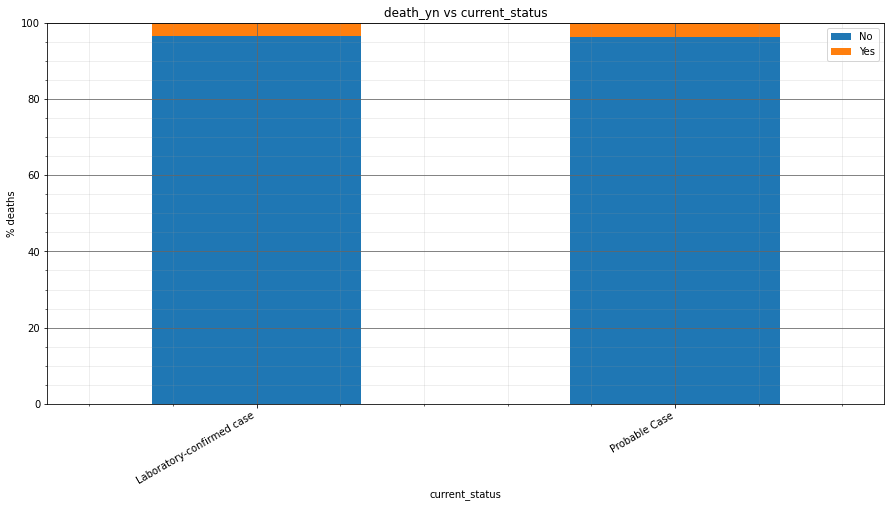

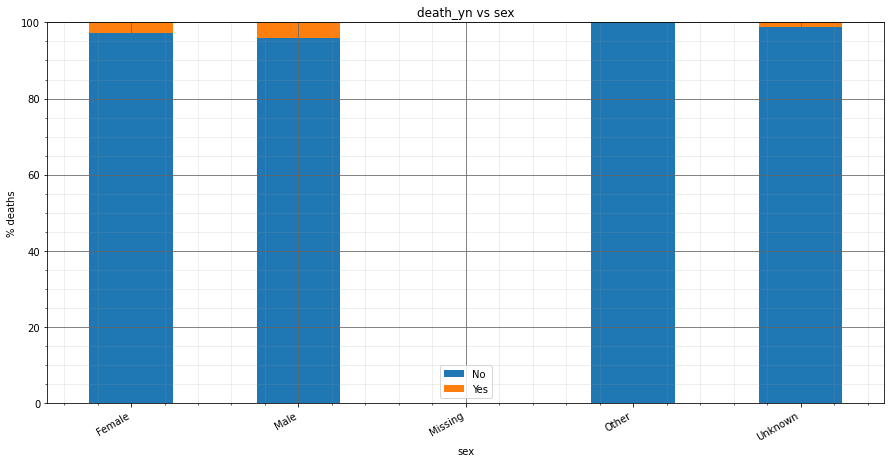

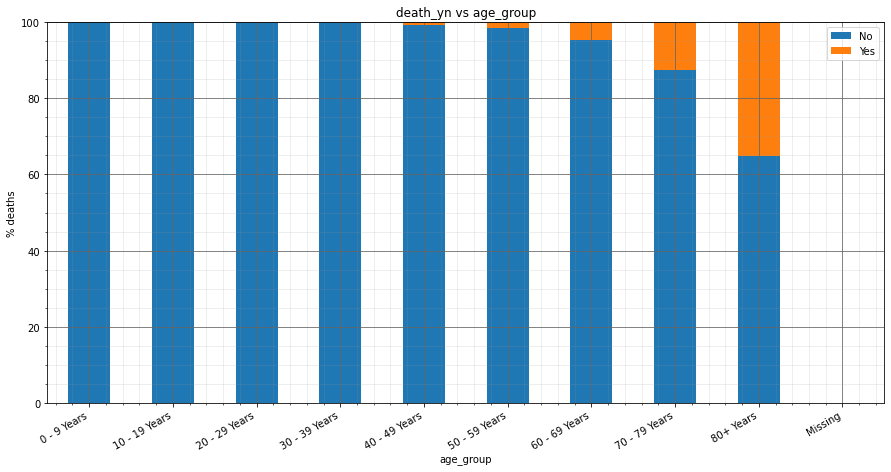

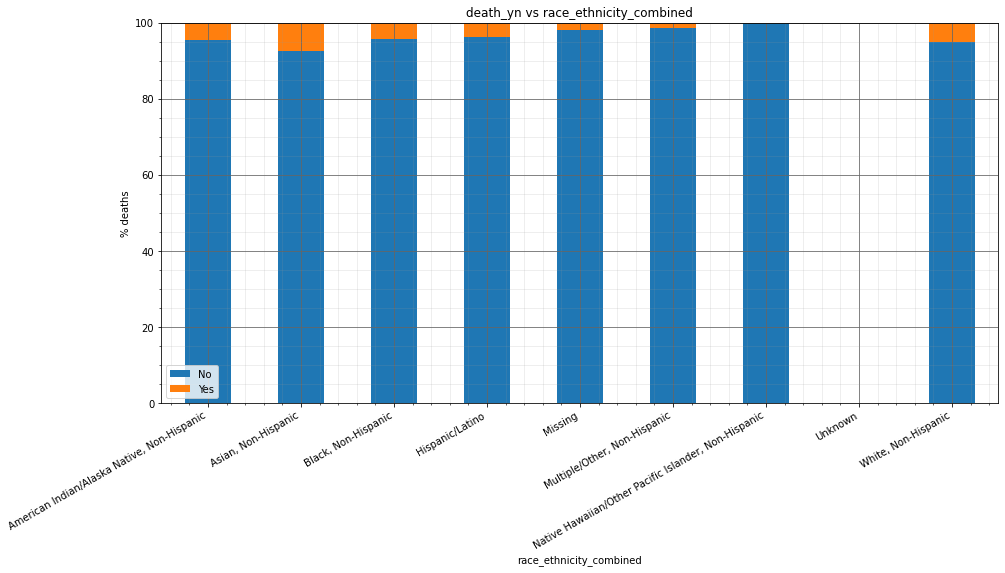

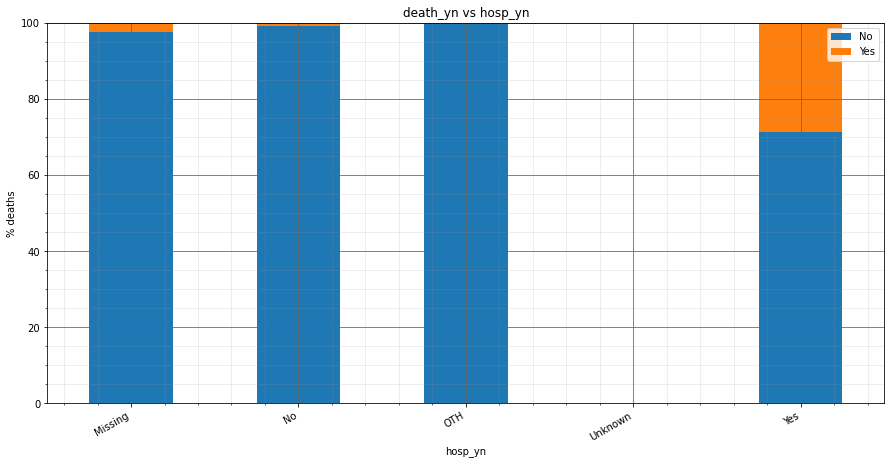

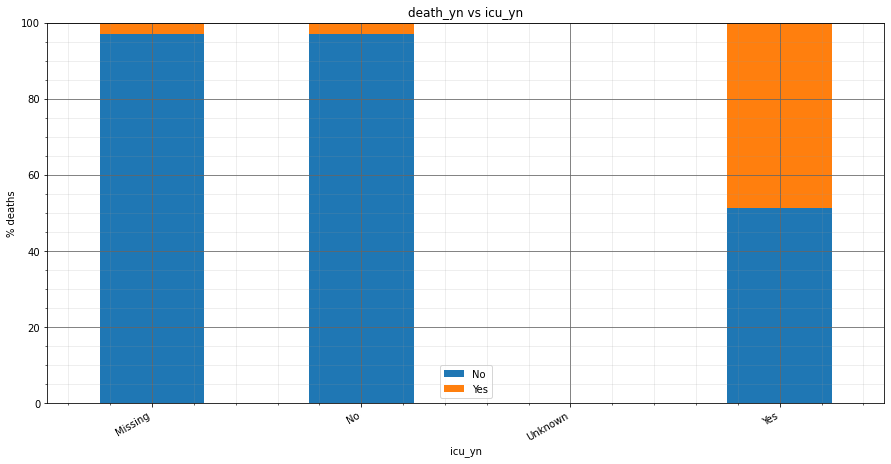

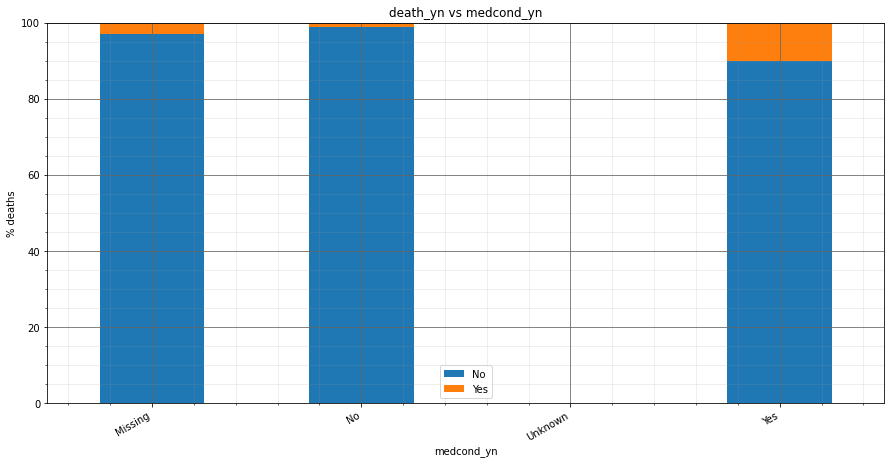

In [111]:
#Using code from the module lab

# to loop through all the features in categorical columns 
for second_feature in category_columns:
    details_of_feature = pd.unique(df[second_feature].ravel())

    # add new column and set values to zero
    df['percent'] = 0

    #print header
    print("\n" + '\033[1m' +second_feature+ '\033[0m')
    print("Index \t Count")
    
#  to avoid plotting between death_yn vs death_yn
    if('death_yn' != second_feature):
            

        # for each delinquency category
        for i in details_of_feature:

            count = df[df[second_feature] == i].count()['death_yn']
            count_percentage = (1 / count) * 100

            # print out index vs count
            print(i, "\t", count)

            index_list = df[df[second_feature] == i].index.tolist()
            for ind in index_list:
                df.loc[ind, 'percent'] = count_percentage

        group = df[['percent',second_feature,'death_yn']].groupby([second_feature,'death_yn']).sum()

        my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs "+second_feature, figsize=(15,7), grid=True)

        # add legend     
        my_plot.legend(["No","Yes"])
        
        # add gridlines
        plt.grid(b=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        plt.xticks(rotation=30, ha='right')
        
        my_plot.set_xlabel(second_feature)
        my_plot.set_ylabel("% deaths")
        my_plot.set_ylim([0,100])
       
    else:
        continue

In [112]:
# confirmation of analysis provided in the graph

print("The number of deaths(Yes) for the age group 80+ years")
print(df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "Yes")].shape)
no_of_yes = df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "Yes")].shape[0]

print("\nThe number of deaths(No) for the age group 80+ years")
print(df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "No")].shape)
no_of_NO = df[(df["age_group"] == "80+ Years") & (df["death_yn"] == "No")].shape[0]
# df[df["age_group"] == "80+ Years"].count()['death_yn']

print("\nThe total number of values in age group '80+ years' with respect to deaths : ")
print(no_of_yes+no_of_NO) #which is expected according to the graph

print("\n% of people not dead :")
print((no_of_NO*100)/(no_of_yes+no_of_NO))

The number of deaths(Yes) for the age group 80+ years
(165, 11)

The number of deaths(No) for the age group 80+ years
(306, 11)

The total number of values in age group '80+ years' with respect to deaths : 
471

% of people not dead :
64.96815286624204


From the above, it is confirmed the analysis according to the graph is as expected. i.e. 65% of people are not dead in the age group of 80+ years which is also shown in stacked plot of age_group vs death_yn

We can see the stacked bar plots for all the categories above. With respect to the relation with target feature,
- in **age_group** feature feature we can observe that the old age people i.e. above 40 years are died due to this COVID-19 in a incresing fashion. 
 - This means that 80+ years category people is having more number of deaths and the number of deaths decreasing as age decreases.

- in **icu_yn** feature, shows that there are more number of deaths among the people who joined in ICU. While there are people who joined in ICU and able to recover(i.e. Not died) are quite less. 

- in **medcond_yn** feature, indicates that the people with presence of disease and died are less likely when compared to the people who are having disease(Yes) and not prone to death(death = No).

- in **sex** feature, there is almost equal number of people in male, female categories are dead with slight variation. But this feature does not provide indicate any trend to the target feature.



- while the **other features** does not indicate any strong trend between the target feature as the number of deaths are available in each sub-category of that feature

##### in all the above columns the missing, unknown categories are considered as seperate categories as they have their special definition with the data. The clear explanation about this is mentioned in the data-quality-report.

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [113]:
df.head(5)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,percent
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,0.012840
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing,0.012840
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Missing,No,Missing,No,No,0.107759
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No,0.107759
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Missing,No,Missing,No,Missing,0.012840


In [114]:
column_names = list(df.columns)
column_names

['cdc_case_earliest_dt',
 'onset_dt',
 'current_status',
 'sex',
 'age_group',
 'race_ethnicity_combined',
 'hosp_yn',
 'icu_yn',
 'death_yn',
 'medcond_yn',
 'percent']

#### New feature 1:

The new feature which is going to be creates here is %deaths_every_30days. This feature gives the information of no of deaths for every 30 days.
To calucate this the cdc_case_earliest_days feature is considered and taken all the rows for 30 days. According to the count of these rows, the percentage of deaths are calculated and filled in the new feature.

In [115]:
# Capture the min date in each feature and store in a varibale as key of a dictionary. 
min_date_of_each_datetime_column = {"cdc_case_earliest_min_date" : df.cdc_case_earliest_dt.min()}
min_date_of_each_datetime_column

{'cdc_case_earliest_min_date': Timestamp('2020-01-04 00:00:00')}

In [116]:
#loop through above dictionary and convert all the dates into no of days
#store the newly converted days columns in a list
column_names_with_days = []
for key,values in min_date_of_each_datetime_column.items():
    column_names_with_days.append(key[:-8]+'days')
    temp_variable = df[key[:-8]+'dt'] - values
    temp_variable = temp_variable/np.timedelta64(1,'D').astype(int) #to convert the result into integer
    temp_variable = temp_variable.dt.days
    df[key[:-8]+'days'] = temp_variable

In [117]:
df['%deaths_every_30days']=df['cdc_case_earliest_days']
for i in range(0, 365, 30):

    no_of_value_in_range = df[(df.cdc_case_earliest_days >= i) & (df.cdc_case_earliest_days < i+30)].shape[0]
    no_of_deaths_in_range = df[(df.cdc_case_earliest_days >= i) & (df.cdc_case_earliest_days < i+30) & (df.death_yn == 'Yes')].shape[0]
    per_deaths = ((100*no_of_deaths_in_range)/no_of_value_in_range)
    index_values = df['%deaths_every_30days'][(df.cdc_case_earliest_days < i+30) & (df.cdc_case_earliest_days >= i)].index.values

    for i in index_values:
        df.loc[i,['%deaths_every_30days']]=per_deaths


In [118]:
#Drop the cdc_case_earliest_days as the %deaths_every_30_days is created.
df.drop('cdc_case_earliest_days', axis='columns', inplace=True)

In [119]:
df

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,percent,%deaths_every_30days
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,0.012840,2.955426
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing,0.012840,3.080569
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Missing,No,Missing,No,No,0.107759,2.955426
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No,0.107759,4.191617
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Missing,No,Missing,No,Missing,0.012840,2.955426
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-10-04,2020-10-04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing,0.012840,3.080569
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Missing,Missing,No,Missing,0.012840,0.822123
9997,2021-01-11,2021-01-11,Laboratory-confirmed case,Male,40 - 49 Years,Missing,No,Missing,No,Missing,0.012840,0.822123
9998,2020-10-02,2020-10-02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing,0.012840,3.080569


<AxesSubplot:title={'center':'%deaths_every_30days'}, xlabel='[death_yn]'>

<Figure size 432x288 with 0 Axes>

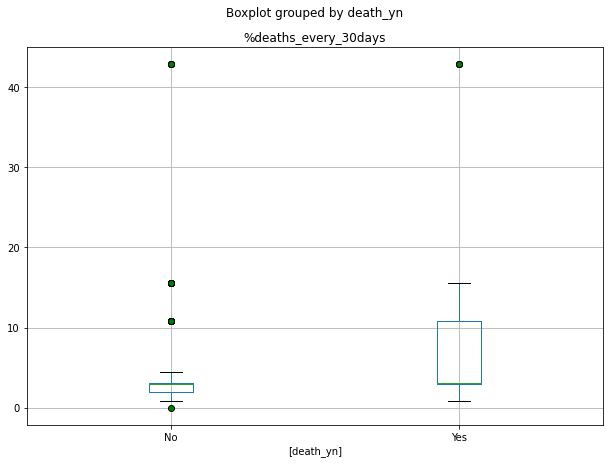

In [120]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
df.boxplot(['%deaths_every_30days'], by=['death_yn'], flierprops=flierprops, figsize=(10,7))

From the above, it indicates that there is good relation between this new feature and target feature. Also, many months are having higher rate of percentage deaths which can be seen in the above box plot. 

#### New feature 2:
This feature is created using the cdc_case_earliest_dt. Every date value in this feature is categorised into four seasons such as Summer, Winter, Spring, Autumn. This feature is then further analysed with realtion to the target feature and examined the results.

In [121]:
df['month'] = df['cdc_case_earliest_dt'].dt.month

In [122]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [123]:
df['month'] = df['month'].astype('category')

In [124]:
df['Seasons'] = df['month'].replace({'Jan':'Winter', 'Feb':'Winter', 'Mar':'Spring', 'Apr':'Spring', 'May':'Spring', 'Jun':'Summer', 'Jul':'Summer', 'Aug':'Summer', 'Sep':'Autumn', 'Oct':'Autumn', 'Nov':'Autumn', 'Dec':'Winter'})

In [125]:
df['Seasons'] = df['Seasons'].astype('category')

In [126]:
df.drop(['month'], axis='columns', inplace=True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Autumn'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

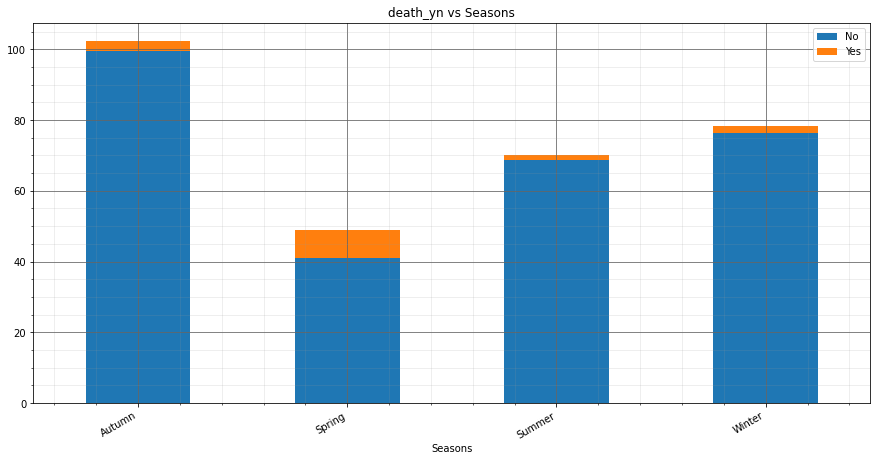

In [127]:
group = df[['percent','Seasons','death_yn']].groupby(['Seasons','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs Seasons", figsize=(15,7), grid=True)

# add legend     
my_plot.legend(["No","Yes"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=30, ha='right')

Each of these seaons are created by selecting appropriate months. The variation between the values in each category towards the target feature indicates that this feature has a good relation to the target feature and may provide good results in modelling.

In [128]:
df

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,percent,%deaths_every_30days,Seasons
1,2020-12-01,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,0.012840,2.955426,Winter
2,2020-10-28,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing,0.012840,3.080569,Autumn
3,2020-12-28,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Missing,No,Missing,No,No,0.107759,2.955426,Winter
4,2020-07-28,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No,0.107759,4.191617,Summer
5,2020-12-02,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Missing,No,Missing,No,Missing,0.012840,2.955426,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-10-04,2020-10-04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing,0.012840,3.080569,Autumn
9996,2021-01-16,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Missing,Missing,No,Missing,0.012840,0.822123,Winter
9997,2021-01-11,2021-01-11,Laboratory-confirmed case,Male,40 - 49 Years,Missing,No,Missing,No,Missing,0.012840,0.822123,Winter
9998,2020-10-02,2020-10-02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing,0.012840,3.080569,Autumn


### New feature: 3
Here the onset_dt is used to extract the information where how fast the person responded to cdc after having symptoms. The value 1 represents that the person went to cdc immediately(with in 5 days) after having symptoms. While the value 0 indicates that person repoted to cdc later(more than 5 days).

In [129]:
# df_on_spec_non_missing['Difference'] = (df_on_spec_non_missing['cdc_case_earliest_dt']-df_on_spec_non_missing['onset_dt']).dt.days
df['Difference'] = (df['cdc_case_earliest_dt']-df['onset_dt']).dt.days

In [130]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
percent                           float64
%deaths_every_30days              float64
Seasons                          category
Difference                        float64
dtype: object

<AxesSubplot:title={'center':'Difference'}, xlabel='[death_yn]'>

<Figure size 432x288 with 0 Axes>

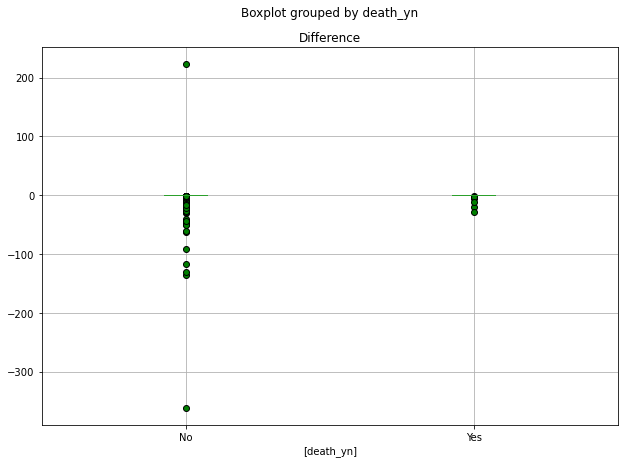

In [131]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
df.boxplot(column=['Difference'], by=['death_yn'], flierprops=flierprops, figsize=(10,7))
# plt.ylim(-30, 10)

##### Explanation and description of new feature 3:
The above boxplot indicates about the people who are effected after repoting to cdc and having symptoms. But there is some wrong information recorded because the number of days between the people who are reported and got symptoms are very high which is impossible(diff of 100 days). Due to which there are more outliers in the data.  
While the below graph shows the results with a range of 0 and -10 which is approximately correct because a person who is having symptoms will be reported to cdc with in approximately 10 days. Henceforth, the new feature indicates whether a person contacted cdc immediatly or not i.e. if person contact with in 5 days then the value turns to 1 and 0 if the difference in number of days is more than that.

(-10.0, 0.0)

<Figure size 432x288 with 0 Axes>

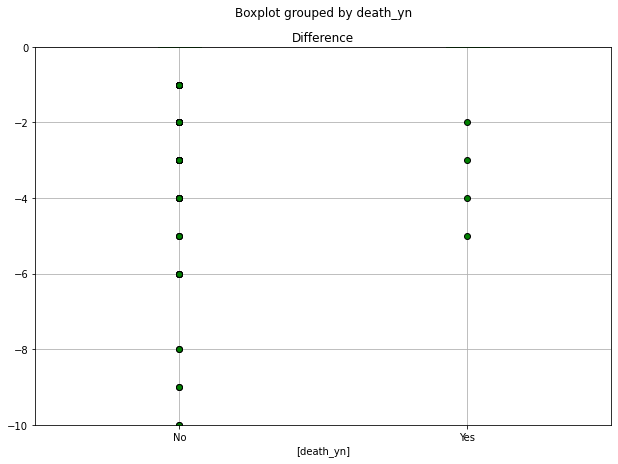

In [132]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
df.boxplot(column=['Difference'], by=['death_yn'], flierprops=flierprops, figsize=(10,7))
plt.ylim(-10, 0)

In [133]:
# df[(df.Difference < -5)]
# df[df['Difference'].isnull()]

# This Difference feature indicates that the count of status of people who responded immediately after getting symptoms.
df[(df.Difference < 0) & (df.Difference >= -5)]

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,percent,%deaths_every_30days,Seasons,Difference
95,2020-12-14,2020-12-15,Laboratory-confirmed case,Female,40 - 49 Years,Missing,Missing,Missing,No,Missing,0.012840,2.955426,Winter,-1.0
127,2020-12-01,2020-12-03,Laboratory-confirmed case,Male,10 - 19 Years,Missing,No,Missing,No,Missing,0.012840,2.955426,Winter,-2.0
444,2020-12-02,2020-12-04,Laboratory-confirmed case,Female,60 - 69 Years,Missing,Missing,Missing,No,Missing,0.012840,2.955426,Winter,-2.0
451,2020-07-11,2020-07-15,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,No,No,No,0.107759,4.191617,Summer,-4.0
488,2020-12-27,2020-12-28,Laboratory-confirmed case,Female,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing,0.012840,2.955426,Winter,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,2020-11-17,2020-11-20,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",No,Missing,No,Missing,0.012840,2.305665,Autumn,-3.0
9641,2020-04-14,2020-04-15,Laboratory-confirmed case,Female,20 - 29 Years,"Asian, Non-Hispanic",No,Missing,No,Missing,0.012840,15.555556,Spring,-1.0
9660,2020-06-05,2020-06-07,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,Yes,No,No,Missing,0.012840,1.941748,Summer,-2.0
9704,2020-12-14,2020-12-15,Laboratory-confirmed case,Female,20 - 29 Years,Missing,Missing,Missing,No,Missing,0.012840,2.955426,Winter,-1.0


In [134]:
df.reset_index(inplace = True)

In [135]:
df['Is_person_Waited_OR_Not']=df['Difference']

people_reported_fast_after_having_symptoms = df[(df.Difference <= 0) & (df.Difference >= -5)].index.values
people_reported_No_Symptoms = df[(df.Difference > 0)].index.values
people_reported_late_having_symptoms = df[(df.Difference < -5)].index.values
people_reported_but_no_date_Of_symptoms = df[df['Difference'].isnull()].index.values

for index, row in df.iterrows():
    if(index in people_reported_fast_after_having_symptoms):
        df.loc[index,['Is_person_Waited_OR_Not']]=1
    elif(index in people_reported_No_Symptoms):
        df.loc[index,['Is_person_Waited_OR_Not']]=0
    elif(index in people_reported_late_having_symptoms):
        df.loc[index,['Is_person_Waited_OR_Not']]=0
    elif(index in people_reported_but_no_date_Of_symptoms):
        df.loc[index,['Is_person_Waited_OR_Not']]=0
    else:
        continue
# no_of_deaths_in_range = df[(df.cdc_case_earliest_days >= i) & (df.cdc_case_earliest_days < i+30) & (df.death_yn == 'Yes')].shape[0]
# per_deaths = ((100*no_of_deaths_in_range)/no_of_value_in_range)
# index_values = df['%deaths_every_30days'][(df.cdc_case_earliest_days < i+30) & (df.cdc_case_earliest_days >= i)].index.values

# for i in index_values:
#     df.loc[i,['%deaths_every_30days']]=per_deaths

Text(0, 0.5, '% deaths')

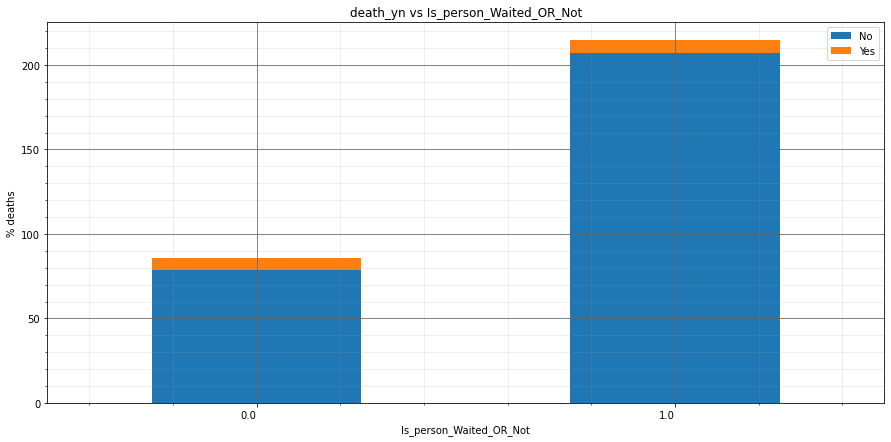

In [136]:
group = df[['percent','Is_person_Waited_OR_Not','death_yn']].groupby(['Is_person_Waited_OR_Not','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs Is_person_Waited_OR_Not", figsize=(15,7), grid=True)

# add legend     
my_plot.legend(["No","Yes"])

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=0, ha='right')

my_plot.set_xlabel('Is_person_Waited_OR_Not')
my_plot.set_ylabel("% deaths")

In [137]:
# As new feature is created, the difference feature is not needed anymore.
df.drop(['Difference'], axis='columns', inplace=True)

### To finish - Print data types, descriptive tables, save to csv

As we created the new feature using onset_dt. Now we can drop the feature as we extracted all the useful information it.

In [138]:
df.drop(['onset_dt'], axis='columns', inplace=True)

In [139]:
df.drop(['index'], axis='columns', inplace=True)

In [140]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
percent                           float64
%deaths_every_30days              float64
Seasons                          category
Is_person_Waited_OR_Not           float64
dtype: object

In [141]:
df

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,percent,%deaths_every_30days,Seasons,Is_person_Waited_OR_Not
0,2020-12-01,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,0.012840,2.955426,Winter,0.0
1,2020-10-28,Laboratory-confirmed case,Female,10 - 19 Years,Missing,Missing,Missing,No,Missing,0.012840,3.080569,Autumn,0.0
2,2020-12-28,Laboratory-confirmed case,Female,30 - 39 Years,Missing,No,Missing,No,No,0.107759,2.955426,Winter,1.0
3,2020-07-28,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,No,0.107759,4.191617,Summer,1.0
4,2020-12-02,Laboratory-confirmed case,Female,20 - 29 Years,Missing,No,Missing,No,Missing,0.012840,2.955426,Winter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,2020-10-04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing,0.012840,3.080569,Autumn,1.0
9531,2021-01-16,Laboratory-confirmed case,Male,40 - 49 Years,Missing,Missing,Missing,No,Missing,0.012840,0.822123,Winter,0.0
9532,2021-01-11,Laboratory-confirmed case,Male,40 - 49 Years,Missing,No,Missing,No,Missing,0.012840,0.822123,Winter,1.0
9533,2020-10-02,Laboratory-confirmed case,Male,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing,0.012840,3.080569,Autumn,1.0


In [142]:
# Write the cleaned dataframe to a csv file
df.to_csv('CDC_1-3_cleaned_new_features_FOR_A2.csv', index=False)